# Práctica 1. Búsqueda heurística

En esta práctica se ha desarrollado el algoritmo A* con y sin ajuste de pesos para el problema planteado. En este problema, se debe calcular el camino óptimo y su coste para alcanzar el destino seleccionado desde un origen determinado. El mapa esta formado por casillas cuadradas blancas y rojas, no siendo accesibles estas últimas. El cerdito únicamente puede moverse de una casilla en una pero en 8 direcciones, estas son, las casillas adyacentes y las diagonales. El coste por movimiento es 1 para las adyacentes y 1,5 para las diagonales.

<img src="https://drive.google.com/uc?export=view&id=1Ei2FLPzFr1cCw0a8uxIMi6E0WotCyGyn" width="400"> &nbsp;&nbsp;&nbsp;&nbsp; <img src="https://drive.google.com/uc?export=view&id=1BASEEAlXmvgbnZHvtDuhrE3O_-ewpAWT" width="400">

## Algoritmo A*

El algoritmo que se ha implementado en esta práctica es un algoritmo de búsqueda que se emplea en el cálculo de caminos óptimos en una red, por lo que se clasifica dentro de los algoritmos de búsqueda en grafos. Hace uso de una función de evaluación heurística mediante la cual etiqueta a los nodos dentro de la red y que determinará la probabilidad de que dichos nodos de pertenezcan al camino óptimo.

Esta función de evaluación, es la siguiente:
> $$f(n) = g(n) + h(n)$$

Como se aprecia, está a su vez compuesta por otra dos funciones. La primera de ellas indica la distancia del camino desde el nodo origen al nodo en evaluación `(n)`. La segunda, calcula la distancia estimada desde el nodo `(n)` hasta el nodo destino (esta última es la que utiliza las diferentes funciones heurísticas).

A continuación se detallan estas funciones g y h:
>- `g(n)`: `c(s, n)`: Calcula el coste desde el nodo origen `(s)` hasta `(n)`. En la implementación se ha hecho de manera que se calcula el coste del nodo `(n)` con su padre y se le suma el coste su padre, de manera que cada nodo acumula el total. Estima el valor de `g*(n)`.
- `h(n)`: Hace una estimación del coste que supone ir desde el nodo actual hasta el nodo destino. Para ello realiza un cálculo siguiendo una heurística. Las heurísticas (heu.) implementadas son las heuristicas Cero, Diagonal, Manhattan, Euclidea y Minkowski; que se detallarán más adelante. Estima el valor de `h*(n)`.
- `f(n)`: Por tanto, f es una composición entre la estimación del coste hasta el destino y el coste acumulado en el nodo `(n)`. Estima el valor de `f*(n)`.

Al tratarse de un algoritmo de busqueda en amplitud, es un algoritmo completo, es decir, en caso de existir una solución, dará siempre con ella.

Para que el algoritmo sea capaz de encontrar el camino óptimo, es necesario que la función `h(n)` sea admisible, es decir, que no sobreestime el coste real de alcanzar el nodo objetivo (`h*(n)`). Cuanto mejor se estime `h*(n)`, mejor optimizado estará el algoritmo, el caso contrario dará lugar a un mayor coste computacional debido a una más exahustiva busqueda de nodos.

La función heurística h(n) será admisible cuando se cumpla que:
> $$h(n) ≤ h*(n) ∀ n$$

### Algoritmo A* con ajuste de pesos

El objetivo y funcionamiento de este algoritmo es el mismo que el A*. El motivo para su uso radica en que el mantenimiento de la admisibilidad fuerza al algoritmo a consumir mucho tiempo en discriminar caminos cuyos costes no varían muy significativamente. Con tal de solucionar este problema, se decide aumentar la velocidad perdiendo acotadamente calidad a través de una relajación de la restricción de optimalidad. Esta relajación se logra mediante el ajuste de pesos.

Para al estimar `f*(n)` en el ajuste de pesos se utiliza una función ponderada:
> $$f_{w}(n) = (1-w)g(n) + wh(n)$$

Dentro del rango 0 ≤ w ≤ 1 obtenemos estrategias mixtas intermedias. Si h(n) es admisible tenemos que: 
- En el rango 0 ≤ w ≤ 1/2, A* con fw(n) también es admisible. 
- Dependiendo de la diferencia existente entre h(n) y h*(n), A con fw(n) puede perder la admisibilidad en el rango 1/2 < w ≤ 1

Es por esto que se ha decidido implementar un w = 0,5

## Código implementado

Se ha implementado una clase Nodo que almacena la información necesaria de cada nodo. Esta información incluye, la casilla del propio nodo, el nodo padre y los valores de `g(n)`, `h(n)` y `f(n)` del nodo. Además de manera estática la clase guarda el método heurístico que se va a usar. Para cambiar entre un método y otro solo se debe cambiar el valor de la variable `heurisiticaSelec` a las diferentes opciones. A continuación se muestra:

In [ ]:
from math import sqrt
from casilla import Casilla

def heuristica0(c1, c2):
    return 0

def heuristicaDiagonal(c1, c2):
    return max(abs(c1.getFila() - c2.getFila()), abs(c1.getCol() - c2.getCol()))

def heuristicaManhattan(c1, c2):
    return abs(c2.getCol() - c1.getCol()) + abs(c2.getFila() - c1.getFila())

def heuristicaEuclidea(c1, c2):
    return sqrt((c2.getCol() - c1.getCol())**2 + (c2.getFila() - c1.getFila())**2)

def heuristicaMinkowski(c1, c2):    #generalización de la euclidea y manhattan, donde el exponente en lugar de ser 2 o 1,
    p = 3                           #respectivamente para las otras, se ha escogido 3
    return (abs(c2.getCol() - c1.getCol())**p + abs(c2.getFila() - c1.getFila())**p)**(1/p)

class Nodo:
    heuristicaSelec = 'ma' #puede variar entre 'mi', 'eu', 'ma', 'di', 'ze'
    def __init__(self, casilla, padre, destino):
        self.casilla = casilla      #Casilla del nodo actual
        self.padre = padre          #Nodo padre
        self.calcular(destino)      #Calcula g, h y f

    def heuristica(self, c1, c2): #Segun la heurística que esté seleccionada, devuelve la función correspondiente
        if Nodo.heuristicaSelec == 'mi':
            return heuristicaMinkowski(c1, c2)
        elif Nodo.heuristicaSelec == 'eu':
            return heuristicaEuclidea(c1, c2)
        elif Nodo.heuristicaSelec == 'ma':
            return heuristicaManhattan(c1, c2)
        elif Nodo.heuristicaSelec == 'di':
            return heuristicaDiagonal(c1, c2)
        elif Nodo.heuristicaSelec == 'ze':
            return heuristica0(c1, c2)
 
    def getHeuristica(): #Devuelve la heurística seleccionada en formato str
        if Nodo.heuristicaSelec == 'mi':
            return 'Minkowski'
        elif Nodo.heuristicaSelec == 'eu':
            return 'Euclidea'
        elif Nodo.heuristicaSelec == 'ma':
            return 'Manhattan'
        elif Nodo.heuristicaSelec == 'di':
            return 'Diagonal'
        elif Nodo.heuristicaSelec == 'ze':
            return 'Cero'

    def getF(self):
        return self.f
    
    def getG(self):
        return self.g

    def getH(self):
        return self.h

    def getCasilla(self):
        return self.casilla
    
    def getPadre(self):
        return self.padre

    def calcG(self): #Calcula g
        g = 0
        if self.casilla != self.padre: #Casilla y padre serán iguales en el caso en que sea el nodo inicial
            if abs(self.casilla.getFila() - self.padre.getCasilla().getFila()) == 1:
                g = 1
            if abs(self.casilla.getCol() - self.padre.getCasilla().getCol()) == 1:
                if g == 1:
                    g = 1.5
                else:
                    g = 1
            g += self.padre.getG()
        self.g = g
    
    def calcH(self, destino): #Calcula h mediante la heurística seleccionada
        self.h = self.heuristica(self.casilla, destino)

    def calcular(self, destino): #Calcula g, h y f para el nodo
        self.calcG()
        self.calcH(destino)
        self.f = self.g + self.h

Además para el algortimo A* con ajuste de pesos se ha utilizado una nueva clase NodoAjustado, la cual hereda de Nodo y guarda de manera estática el coeficiente de ajuste. Se muestra a continuación:

In [ ]:
class NodoAjustado(Nodo):
    w = 0.5 #Ajuste de pesos
    def calcular(self, destino):
        self.calcG()
        self.calcH(destino)
        self.f = (1 - NodoAjustado.w)*self.g + NodoAjustado.w*self.h

El algoritmo A* utiliza dos listas, una llamada listaInterior en la que almacena los nodos ya explorados, y otra llamada listaFrontera en la que se irán almacenando los nodos a explorar que son frontera del nodo que se explore en cada iteración. Esta última se inicializa con el nodo origen.

Hasta que la listaFrontera se vacie, esto solo ocurre en caso de que no haya camino posible hasta el destino, se itera lo siguiente: 
- Se obtiene el nodo más prometedor de la listaFrontera (`n`), este es el que menor `f(n)` tenga.
- En caso de ser el nodo destino el algoritmo habrá finalizado, construirá el camino en el mapa y devolverá el coste total de este.
- En caso contrario, añadirá `n` a la listaInterior después de eliminarlo de la listaFrontera e incluirá los nodos hijos de `n`, estos son aquellos nodos accesibles desde `n`, que no se encuentren en la listaInterior a la listaFrontera.
- Si la listaFrontera se ha vaciado y no se ha encontrado el destino la función devuelve `-1`.

A continuación se muestra la implementación del algoritmo y las funciones externas que utiliza:

In [ ]:
def equalsCasillas(c1, c2): #Dos casillas son iguales si sus filas y columnas son iguales
    if c1.getFila() == c2.getFila() and c1.getCol() == c2.getCol():
        return True
    return False

def obtenerMejor(listaNodos): #Devuelce el nodo con mayor h
    mejor = 0
    for n in listaNodos:
        if mejor == 0:
            mejor = n
        elif mejor.getF() > n.getF():
            mejor = n
    return mejor

def construirCamino(camino, nodo): #devuelve el coste del camino trazado y actualiza la matriz del camino marcando las casilla utilizadas
    g = nodo.getG()
    while type(nodo.getPadre()) == Nodo or type(nodo.getPadre()) == NodoAjustado: #La casilla origen se guarda como casilla y no como nodo
        nodo = nodo.getPadre()
        camino[nodo.getCasilla().getFila()][nodo.getCasilla().getCol()] = "*" #Pertenece al camino

    return g

def bueno(mapi, casilla):
    pass

def listaHijos(nodo, mapa, destino, ajustado): #devuelve una lista de los nodos hijos de otro nodo
    lista = []
    for i in [0, -1, 1]:
        for j in [0, -1, 1]:
            casillaPrueba = Casilla(nodo.getCasilla().getFila() - i, nodo.getCasilla().getCol() - j)
            if bueno(mapa, casillaPrueba) and not (i == j == 0):
                if ajustado:
                    lista.append(NodoAjustado(casillaPrueba, nodo, destino))
                else:
                    lista.append(Nodo(casillaPrueba, nodo, destino))
    return lista

def seEncuentra(nodo, lista): #Comprueba si existe el nodo en la lista
    if len(lista) == 0:
        return False
    for n in lista:
        if equalsCasillas(nodo.getCasilla(), n.getCasilla()) and equalsCasillas(nodo.getPadre().getCasilla(), n.getPadre().getCasilla()):
            return True
    return False

def comparaIncluye(lista, nodo, mExplorados, nExplorados): #comprueba si la casilla está en la lista, de ser así conserva la que menor g tenga. De no estar, la añade como nodo 
    esta = False
    for n in lista:
        if equalsCasillas(n.getCasilla(), nodo.getCasilla()):
            if n.getG() > nodo.getG():
                lista.remove(n)
                lista.append(nodo)
            esta = True
    if not esta:
        lista.append(nodo)
        mExplorados[nodo.getCasilla().getFila()][nodo.getCasilla().getCol()] = nExplorados[0] + 1
        nExplorados[0] += 1

def equalsNodos(n1, n2): #Si las casillas y las casillas de los padres son iguales, los nodos son iguales 
    if not equalsCasillas(n1.getCasilla(), n2.getCasilla()):
        return False
    if type(n1.getPadre()) == Nodo or type(n1.getPadre()) == NodoAjustado:
        if type(n2.getPadre()) == Nodo or type(n2.getPadre()) == NodoAjustado:
            if not equalsCasillas(n1.getPadre().getCasilla(), n2.getPadre().getCasilla()):
                return False
        else:
            if not equalsCasillas(n1.getPadre().getCasilla(), n2.getPadre()):
                return False
    else:
        if type(n2.getPadre()) == Nodo or type(n2.getPadre()) == NodoAjustado:
            if not equalsCasillas(n1.getCasilla(), n2.getPadre().getCasilla()):
                return False
        else:
            if not equalsCasillas(n1.getPadre().getCasilla(), n2.getCasilla()):
                return False
    return True
            
def eliminarDeLista(l1, l2): #Devuelve una lista resultado de la diferencia entre la primera y la segunda (l1 - l2)
    lf = []
    for n in l1:
        esta = False
        for m in l2:
            if (equalsCasillas(n.getCasilla(), m.getCasilla())):
                esta = True
        if esta == False:
            lf.append(n)
    return lf

In [ ]:
def aEstrella(mapi, origen, destino, camino, mExplorados, nExplorados):
    listaInterior = []
    listaFrontera = [Nodo(origen, origen, destino)] #inicializala lista con el nodo origen
    while len(listaFrontera) != 0:
        n = obtenerMejor(listaFrontera) # obtiene el nodo con menor coste esperado
        if equalsCasillas(n.getCasilla(), destino): #ha llegado a la meta
            return construirCamino(camino, n)
        else:
            listaFrontera.remove(n)
            listaInterior.append(n)

            for m in eliminarDeLista(listaHijos(n, mapi, destino, False), listaInterior):
                comparaIncluye(listaFrontera, m, mExplorados, nExplorados)
    return -1

La diferencia entre la implementación del algoritmo con y sin ajuste de pesos en su implementación es únicamente que este va a utilizar nodos de tipo NodoAjustado, pues estos almacenan los datos de `f(n)` con el ajuste.

In [ ]:
def aEstrellaAjustado(mapi, origen, destino, camino, mExplorados, nExplorados):
    listaInterior = []
    listaFrontera = [NodoAjustado(origen, origen, destino)] #inicializala lista con el nodo origen
    while len(listaFrontera) != 0:
        n = obtenerMejor(listaFrontera) # obtiene el nodo con menor coste esperado
        if equalsCasillas(n.getCasilla(), destino): #ha llegado a la meta
            return construirCamino(camino, n)
        else:
            listaFrontera.remove(n)
            listaInterior.append(n)

            for m in eliminarDeLista(listaHijos(n, mapi, destino, True), listaInterior):
                comparaIncluye(listaFrontera, m, mExplorados, nExplorados)
    return -1

Otras diferencias implementadas con respecto al código de la plantilla son:
- Una variable `modoAjustado` booleana para controlar si llamar al algoritmo con o sin ajuste de pesos.
- Código que permite cronometrar la duración de cada ejecución del algoritmo y guardar estos datos, clasificados por mapa y método heurístico.
- Codigo que almacena en este archivo de datos el camino explorado y un mapa con el orden de exploración de los nodos. Además el número de nodos explorados

A continuación se realizarán una traza detallada para el algoritmo A*, otra para el algoritmo A⋆ con ajuste de pesos y un analisis de las diferentes heurísticas. En estos procedimientos se han utilizado diferentes mapas que se pueden observar en la última sección de esta memoria.

## Traza detallada A*

Para realizar esta traza se ha utilizado el mapa del archivo `mapaChico.txt`. En este mapa, la ficha comienza en la casilla (4, 4). Se ha seleccionado como objetivo la casilla (6, 6).

<img src="https://drive.google.com/uc?export=view&id=1Q44KpNu42pthZ0b-hqz-bZMi1rUGiLJb" > &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <img src="https://drive.google.com/uc?export=view&id=1DXI4xYQIOtr16lelt80jhbGv6MXT2wrd" >

La traza se ha realizado con la heurística euclidea.

Para ejecutar esta búsqueda, el algoritmo ha tardado lo siguiente en ejecutarse:

In [2]:
fich = open('../Fuente/datos-mapaChico.txt', 'r')
fila=-1
txt = ''
for i in fich:
  txt += i
fich.close()
data = txt.split('\n')
i = 0
while data[i] != 'Heuristica Euclidea {':
  i += 1
print('Tiempo: ' + data[i+1].split(' ')[7] + 'ms') #En el formato en que se guardan los datos, el tiempo siempre estará en el lugar 7 de esta lista

Tiempo: 0.48923492431640625ms


El camino que sigue la ficha es (4, 4), (5, 3), (6, 3), (7, 4), (7, 5) y (6, 6). Como se muestra en la segunda imagen, el coste total es de 6,5, que viene de 3 movimientos diagonales y 2 adyacentes (3×1,5 + 2×1 = 6,5). 

A continuación se muestran una matriz que indica el órden en que se han explorado los nodos:

In [3]:
while data[i] != 'Camino explorado:':
  i += 1
while data[i-1] != 'Nodos explorados: 14':
  print(data[i])
  i += 1

Camino explorado:
-1 -1 -1 -1 -1 -1 -1 -1 -1 
-1 -1 -1 -1 -1 -1 -1 -1 -1 
-1 -1 -1 -1  9  8 -1 -1 -1 
-1 -1  6 -1 -1  4  7 10 -1 
-1 -1 -1  1  0 -1 -1 11 -1 
-1 -1 -1  3  2 -1 13 12 -1 
-1 -1 -1 -1  5 -1 14 -1 -1 
-1 -1 -1 -1 -1 -1 -1 -1 -1 
Nodos explorados: 14


Como se puede apreciar en el orden, se van explorando casillas en dirección hacia el objetivo. Analizando iteración a iteración el algoritmo tenemos lo siguiente (el formato de representación de nodos será ((x, y), f), estando f aproximada a 2 decimales):

| Iteración |                                          listaFrontera                                         |                                                                        listaInterior                                                                        |
|----------:|:----------------------------------------------------------------------------------------------:|:-----------------------------------------------------------------------------------------------------------------------------------------------------------:|
|         0 |                                        [((4, 4), 2.82)]                                        |                                                                              []                                                                             |
|         1 |                [((3, 4), 4.61), ((4, 5), 3.24), ((3, 5), 4.66), ((5, 3), 4.66)]                |                                                                       [((4, 4), 2.82)]                                                                      |
|         2 |                  [((3, 4), 4.61), ((3, 5), 4.66), ((5, 3), 4.66), ((4, 6), 4)]                 |                                                               [((4, 4), 2.82), ((4, 5), 3.24)]                                                              |
|         3 |                        [((3, 4), 4.61), ((3, 5), 4.66), ((5, 3), 4.66),]                       |                                                        [((4, 4), 2.82), ((4, 5), 3.24), ((4, 6), 4)]                                                        |
|         4 |                         [((3, 5), 4.66), ((5, 3), 4.66), ((2, 3), 7.5)]                        |                                                [((4, 4), 2.82), ((4, 5), 3.24), ((4, 6), 4), ((3, 4), 4.61)]                                                |
|         5 |                                 [((5, 3), 4.66), ((2, 3), 7.5)]                                |                                        [((4, 4), 2.82), ((4, 5), 3.24), ((4, 6), 4), ((3, 4), 4.61), ((3, 5), 4.66)]                                        |
|         6 |                 [((2, 3), 7.5), ((6, 3), 5.5), ((5, 2), 6.62), ((4, 2), 7.47)]                 |                                [((4, 4), 2.82), ((4, 5), 3.24), ((4, 6), 4), ((3, 4), 4.61), ((3, 5), 4.66), ((5, 3), 4.66)]                                |
|         7 |         [((2, 3), 7.5), ((5, 2), 6.62), ((4, 2), 7.47), ((7, 3), 6.66), ((7, 4), 6.24)]        |                         [((4, 4), 2.82), ((4, 5), 3.24), ((4, 6), 4), ((3, 4), 4.61), ((3, 5), 4.66), ((5, 3), 4.66), ((6, 3), 5.5)]                        |
|         8 | [((2, 3), 7.5), ((5, 2), 6.62), ((4, 2), 7.47), ((7, 3), 6.66), ((7, 5), 6.41), ((6, 5), 6.5)] |                 [((4, 4), 2.82), ((4, 5), 3.24), ((4, 6), 4), ((3, 4), 4.61), ((3, 5), 4.66), ((5, 3), 4.66), ((6, 3), 5.5), ((7, 4), 6.24)]                |
|         9 | [((2, 3), 7.5), ((5, 2), 6.62), ((4, 2), 7.47), ((7, 3), 6.66), ((6, 5), 6.5), **((6, 6), 6.5)**]  | [((4, 4), 2.82), ((4, 5), 3.24), ((4, 6), 4), ((3, 4), 4.61), ((3, 5), 4.66), ((5, 3), 4.66), ((6, 3), 5.5), ((7, 4), 6.24), ((7, 5), 6.41)]                |
|        10 | [((2, 3), 7.5), ((5, 2), 6.62), ((4, 2), 7.47), ((7, 3), 6.66), **((6, 6), 6.5)**]                 | [((4, 4), 2.82), ((4, 5), 3.24), ((4, 6), 4), ((3, 4), 4.61), ((3, 5), 4.66), ((5, 3), 4.66), ((6, 3), 5.5), ((7, 4), 6.24), ((7, 5), 6.41), ((6, 5), 6.5)] |

En cada iteración se extrae el nodo de la listaFrontera con menor f y se añade a listaInterior. Después se añaden las casillas adyacentes y diagonales de este nodo que sean válidas (que no sean rojas). Por ejemplo en la iteración 2 se ha añadido el nodo de la casilla (4, 6) a la listaFrontera, hijo del nodo de la casilla (4, 5), que previamente se ha extraído de la listaFrontera y ahora se halla en la listaInterior. 

Esta tabla refleja los nodos y sus valores de f, pero es necesario explicar cual ha sido el cálculo realizado para obtener este valor f. Como ejemplo se utilizarán las casilla mencionada previamente, (4, 5) y (4, 6):
- El nodo de la casilla (4, 5) es hijo del nodo de la casilla origen (4, 4) y estas dos son casillas adyacentes, por lo que el valor de g es 1.
- La distancia euclidea se calcula de la siguiente forma: 
$$d(A, B) = \sqrt{(X_{A} - X_{B})^2 + (Y_{A} - Y_{B})^2}$$ Esto es, la raiz de los cuadrados de las diferencias de coordenadas. Para el cálculo de h se ha utilizado esta distancia y por tanto el valor de h para la casilla (4, 5) es raíz de 5 (aproximado a 2 decimales 2.24).
- La f se calcula como la suma de g y h, por tanto para la casilla (4, 5) será 1 + 2.24 = 3.24. Como vemos en la tabla este resultado es así.
-Repitiendo estos pasos para el nodo de la casilla (4, 6) tenemos que: g ≡ 1 + g(4,5) = 2; h ≡ raíz de 4 = 2; y por tanto f ≡ 2 + 2 = 4.

Se puede apreciar también, como el orden en que se van añadiendo nodos a la listaFrontera es el mismo que el que se indica en la matriz anterior.

Para obetener los datos de la tabla de iteraciones se ha realizado una traza paso a paso con el debugger de python de Visual Studio Code, que nos permite ver el valor de las variables locales en cada punto de ejecución. Los datos de las listas se han extraído al comienzo de cada iteración del bucle que examina si listaFrontera está vacía. En esta vista se aprecia el valor de las variables locales al comienzo de la primera iteración:

<img src="https://drive.google.com/uc?export=view&id=1GUaGX4c6sm8XvL4w9BzrdWuyRk9Dr6MR" >

### Traza con destino no alcanzable

Además se ha realizado otra traza en el mismo mapa. En esta, se ha seleccionado como casilla destino la (7, 1), que como se puede apreciar en la imagen del mapa, es inaccesible. 

En este caso el algoritmo explora todos los nodos accesibles pero no logra encontrar el nodo de la casilla destino, por lo que finaliza lanzando un mensaje.

<img src="https://drive.google.com/uc?export=view&id=17R_4GQrGsfQ51tTKfMuofaFbVh8CsXmK" >

El tiempo que ha tardado en ejecutarse el algorimto es el siguiente:


In [4]:
while data[i] != 'Camino:':
  i += 1
print('Tiempo: ' + data[i-1].split(' ')[7] + 'ms')

Tiempo: 1.306772232055664ms


Se puede apreciar que el tiempo que ha tardado es bastante mayor al de la otra traza, esto se debe a que, al no ser posible alcanzar el destino, antes explorará todos los nodos. El orden de exploración de nodos por parte del algoritmo es el siguiente:

In [5]:
while data[i] != 'Camino explorado:':
  i += 1
while data[i-1] != 'Nodos explorados: 23':
  print(data[i])
  i += 1

Camino explorado:
-1 -1 -1 -1 -1 -1 -1 -1 -1 
-1 -1 -1 -1 11 10 -1 -1 -1 
-1 20 19 14  7  6 -1 -1 -1 
-1 17 12 -1 -1  4  5  8 -1 
-1 18 -1  1  0 -1 -1  9 -1 
-1 22 -1  3  2 -1 16 15 -1 
-1 23 -1 -1 13 -1 21 -1 -1 
-1 -1 -1 -1 -1 -1 -1 -1 -1 
Nodos explorados: 23


## Traza detallada A* con ajuste de pesos

Para realizar esta traza se ha utilizado el mismo mapa que en ejemplo anterior, además de el mismo destino. Se ha elegido de este modo para poder realizar una mejor comparación. Se ha utilizado w = 0.5 para el ajuste de pesos.

Puesto que el problema realizado es pequeño y la heurística es la misma, el camino resultante es el mismo. Es además normal también porque hay poca variedad de caminos óptimos para este caso. 

Para este ejemplo es difícil resaltar las diferencias entre un algoritmo y otro, más alla del tiempo de ejecución. Más adelante se realizará un analisis de las diferencias entre los algoritmos mediante trazas más complejas.

El tiempo que ha tardado el algoritmo en ejecutar esta traza es el siguiente:

In [6]:
fich = open('../Fuente/datos-mapaChico-ajustado.txt', 'r')
fila=-1
txt = ''
for i in fich:
  txt += i
fich.close()
data = txt.split('\n')
i = 0
while data[i] != 'Heuristica Euclidea {':
  i += 1
print('Tiempo: ' + data[i+1].split(' ')[7] + 'ms') 

Tiempo: 2.069711685180664ms


Se puede apreciar que el coste temporal de este algoritmo es mayor en esta traza. Esto se debe a que, puesto que la traza es bastante pequeña, el ajuste de pesos no ayuda a agilizar el proceso, sino que por contrario lo entorpece. Como se ha mencionado, más adelante se hará un estudio más profundo de las diferencias.

El orden de exploración de nodos es el mismo y se muestra a continuación, además, siendo este orden igual, los contenidos de las listas frontera e interior, también coinciden. Vemos también que la cantidad de nodos explorados es la misma.

In [7]:
while data[i] != 'Camino explorado:':
  i += 1
while data[i-1] != 'Nodos explorados: 14':
  print(data[i])
  i += 1

Camino explorado:
-1 -1 -1 -1 -1 -1 -1 -1 -1 
-1 -1 -1 -1 -1 -1 -1 -1 -1 
-1 -1 -1 -1  9  8 -1 -1 -1 
-1 -1  6 -1 -1  4  7 10 -1 
-1 -1 -1  1  0 -1 -1 11 -1 
-1 -1 -1  3  2 -1 13 12 -1 
-1 -1 -1 -1  5 -1 14 -1 -1 
-1 -1 -1 -1 -1 -1 -1 -1 -1 
Nodos explorados: 14


### Traza con destino no alcanzable

También para el algoritmo con ajuste de pesos, se ha realizado una traza con un destino no alcanzable. Al igual que en el caso de la traza alcanzable, el camino y orden de exploración es igual que con el algoritmo sin ajuste. Como con el algoritmo sin ajuste, el tiempo de ejecución de esta traza es superior a la traza en que sí alcanza el objetivo. Este tiempo es:

In [8]:
while data[i] != 'Camino:':
  i += 1
print('Tiempo: ' + data[i-1].split(' ')[7] + 'ms')

Tiempo: 5.713701248168945ms


Y a continuación vemos que el orden de exploración de nodos y la cantidad es igual también:

In [9]:
while data[i] != 'Camino explorado:':
  i += 1
while data[i-1] != 'Nodos explorados: 23':
  print(data[i])
  i += 1

Camino explorado:
-1 -1 -1 -1 -1 -1 -1 -1 -1 
-1 -1 -1 -1 11 10 -1 -1 -1 
-1 20 19 14  7  6 -1 -1 -1 
-1 17 12 -1 -1  4  5  8 -1 
-1 18 -1  1  0 -1 -1  9 -1 
-1 22 -1  3  2 -1 16 15 -1 
-1 23 -1 -1 13 -1 21 -1 -1 
-1 -1 -1 -1 -1 -1 -1 -1 -1 
Nodos explorados: 23


## Análisis de heurísticas

Previamente se han realizado trazas detalladas para los algoritmos A* con y sin ajuste de pesos para la heurística euclidea, es por ello que ahora se analizarán, de una forma menos detallada, el resto de heurísticas. También se emplea w = 0.5 para el ajuste de pesos. Estas heurísticas son:
- Heurística cero
- Heurística diagonal
- Heurística Manhattan
- Heurística euclidea
- Heurística Minkowski

El análisis se realizará mediante el coste temporal que generan estas heurísticas en diferentes trazas de diferentes mapas y mediante el análisis de nodos explorados. Tanto para el algoritmo con y sin ajuste de pesos el número de nodos explorados no varía en ningún caso.

Se ha desarrollado un código que ejecuta unos tests de los algoritmos y almacena los resultados temporales y cantidad de nodos explorados. El test temporal ejecuta los algoritmos con y sin ajuste, para cada una de las heurísticas y cada uno de los mapas un total de 10 veces, almacenando la media de tiempo de ejecución. Por su parte, el test de nodos ejecuta solo el algoritmos con ajuste, para cada una de las heurísticas y cada uno de los mapas, pero únicamente una vez. 

De este modo podemos realizar un analisis de un modo más sencillo, al recoger los datos en tres ficheros: uno para el test temporal del algoritmo sin ajuste, otro para el test temporal del algoritmo ajustado y otro para el test de nodos del algoritmo sin ajuste.

Estas son las funciones empleadas:

In [ ]:
orden = [("Mundos/mapa.txt", Casilla(3, 1)),
             ("Mundos/mapa2.txt", Casilla(5, 1)),
             ("Mundos/mapa3.txt", Casilla(1, 1)),
             ("Mundos/mapaChico.txt", Casilla(6, 6)),
             ("Mundos/mapaCruz.txt", Casilla(3, 1)),
             ("Mundos/mapaCubo.txt", Casilla(4, 12)),
             ("Mundos/mapaCuboDoble.txt", Casilla(1, 12)),
             ("Mundos/mapaGrande.txt", Casilla(14, 2)),
             ("Mundos/mapaLaberinto.txt", Casilla(13, 13)),
             ("Mundos/mapaPlano.txt", Casilla(3, 1))]

def testiempo(destino, file, ajustado):    
    mapi=Mapa(file)
    origen=mapi.getOrigen()    
    camino=inic(mapi)   
    
    casi=Casilla(destino.getFila(), destino.getCol())
    if bueno(mapi, casi):                                             
        mapi.setCelda(int(origen.getFila()), int(origen.getCol()), 0) #se marca como libre la celda origen
        destino=casi                        
        camino=inic(mapi)
        # llamar al A*
        nExplorados = [0]
        mExplorados = exploIni(mapi, origen)
        start_t = time.time()
        if ajustado:
            aEstrellaAjustado(mapi, origen, destino, camino, mExplorados, nExplorados)
        else:
            aEstrella(mapi, origen, destino, camino, mExplorados, nExplorados)      
        end_t = time.time() - start_t
    return end_t*1000

def testnodos(destino, file):    
    mapi=Mapa(file)
    origen=mapi.getOrigen()    
    camino=inic(mapi)   
    
    casi=Casilla(destino.getFila(), destino.getCol())
    if bueno(mapi, casi):                                             
        mapi.setCelda(int(origen.getFila()), int(origen.getCol()), 0) #se marca como libre la celda origen
        destino=casi                        
        camino=inic(mapi)
        # llamar al A*
        nExplorados = [0]
        mExplorados = exploIni(mapi, origen)
        aEstrellaAjustado(mapi, origen, destino, camino, mExplorados, nExplorados)
    return nExplorados

def analisis(fi, aj):
    fi.write('   ')
    for x, y in orden:
        wname = ''
        for l in x:
            if l == '.':
                break
            wname += l
            if l == '/':
                wname = ''
        fi.write(wname)
        for i in range(19-len(wname)):
            fi.write(' ')
    fi.write('\n')
    for heu in ['ce', 'di', 'ma', 'eu', 'mi']: # Para cada heurística
        Nodo.heuristicaSelec = heu
        fi.write(heu + ' ')
        for file, casilla in orden: # Para cada mapa y su casilla destino
            media = 0
            for i in range(10): # se ejecuta 10 veces
                media += testiempo(casilla, file, aj)
            fi.write(str(media / 10) + " ") # se almacena el tiempo medio de ejecución
        fi.write('\n')

def nodos(fi, aj):
    for x, y in orden:
        wname = ''
        for l in x:
            if l == '.':
                break
            wname += l
            if l == '/':
                wname = ''
        fi.write(wname)
        fi.write(' ')
    fi.write('\n')
    for heu in ['ce', 'di', 'ma', 'eu', 'mi']: # Para cada heurística
        Nodo.heuristicaSelec = heu
        fi.write(heu + ' ')
        for file, casilla in orden: # Para cada mapa y su casilla destino
            fi.write(str(testnodos(casilla, file)[0]) + " ") # se almacena el tiempo medio de ejecución
        fi.write('\n')

def test1():
    fi = open("Fuente/analisis-ajustado.txt", "w")
    analisis(fi, True)
    fi.close()
    fi = open("Fuente/analisis.txt", "w")
    analisis(fi, False)
    fi.close()
    print("Fin")

def test2():
    fi = open("Fuente/nodos.txt", "w")
    nodos(fi)
    fi.close()
    print("Fin")

Como se puede ver, es el código del main pero simplificado, de manera que no utiliza la interfaz gráfica. Ademas el test es parametrizado, para cada mapa se utiliza una casilla de destino. Estos parámetros son:
- mapa.txt, Casilla(3, 1)
- mapa2.txt, Casilla(5, 1)
- mapa3.txt, Casilla(1, 1)
- mapaChico.txt, Casilla(6, 6)
- mapaCruz.txt, Casilla(3, 1)
- mapaCubo.txt, Casilla(4, 12)
- mapaCuboDoble.txt, Casilla(1, 12)
- mapaGrande.txt, Casilla(14, 2)
- mapaLaberinto.txt, Casilla(13, 13)
- mapaPlano.txt, Casilla(3, 1)

Se ejecuta dos veces la función `analisis`, una con `aj = False` y otra con `aj = True` y se almacenan los datos en los ficheros analisis.txt y analisis-ajustado.txt. La función nodos se ejecuta una vez y almacena sus resulatdos en nodos.txt.

A continuación extraemos los datos de los ficheros:

In [12]:
an = open('../Fuente/analisis.txt', 'r')
txt = ''
for i in an:
  txt += i
an.close()
data = txt.split('\n')
mapas = data[0].split(' ')
for i in range(100):
    mapas.remove('')

ce = data[1].split(' ')
ce.remove('ce')
for i in range(len(ce)):
  ce[i] = float(ce[i])

di = data[2].split(' ')
di.remove('di')
for i in range(len(di)):
  di[i] = float(di[i])

ma = data[3].split(' ')
ma.remove('ma')
for i in range(len(ma)):
  ma[i] = float(ma[i])

eu = data[4].split(' ')
eu.remove('eu')
for i in range(len(eu)):
  eu[i] = float(eu[i])

mi = data[5].split(' ')
mi.remove('mi')
for i in range(len(mi)):
  mi[i] = float(mi[i])

an = open('../Fuente/analisis-ajustado.txt', 'r')
txt = ''
for i in an:
  txt += i
an.close()
data = txt.split('\n')

cea = data[1].split(' ')
cea.remove('ce')
for i in range(len(cea)):
  cea[i] = float(cea[i])

dia = data[2].split(' ')
dia.remove('di')
for i in range(len(dia)):
  dia[i] = float(dia[i])

maa = data[3].split(' ')
maa.remove('ma')
for i in range(len(maa)):
  maa[i] = float(maa[i])

eua = data[4].split(' ')
eua.remove('eu')
for i in range(len(eua)):
  eua[i] = float(eua[i])

mia = data[5].split(' ')
mia.remove('mi')
for i in range(len(mia)):
  mia[i] = float(mia[i])

an = open('../Fuente/nodos.txt', 'r')
txt = ''
for i in an:
  txt += i
an.close()
data = txt.split('\n')

nce = data[1].split(' ')
nce.remove('ce')
for i in range(len(nce)):
  nce[i] = int(nce[i])

ndi = data[2].split(' ')
ndi.remove('di')
for i in range(len(ndi)):
  ndi[i] = int(ndi[i])

nma = data[3].split(' ')
nma.remove('ma')
for i in range(len(nma)):
  nma[i] = int(nma[i])

neu = data[4].split(' ')
neu.remove('eu')
for i in range(len(neu)):
  neu[i] = int(neu[i])

nmi = data[5].split(' ')
nmi.remove('mi')
for i in range(len(nmi)):
  nmi[i] = int(nmi[i])

### Heurística cero

La heurística cero no realiza cálculos. El valor de h para cualquier nodo será 0 siempre. Es por esto que esta heurística es muy ineficiente, ya que visitará los nodos en el orden de exploración, y por tanto visitará nodos de forma innecesaria.

Veamos cuanto ha tardado el algoritmo sin ajuste de pesos en ejecutarse para cada uno de los mapas.



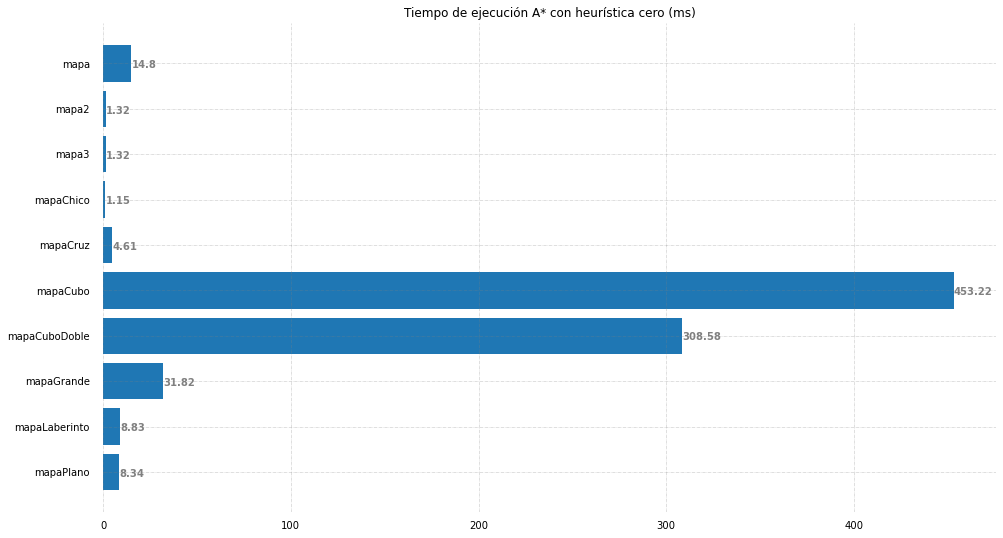

In [13]:
import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(mapas, ce)
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.5)
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight ='bold', color ='grey')
ax.set_title('Tiempo de ejecución A* con heurística cero (ms)', loc ='center')
plt.show()

A continuación la gráfica para los tiempos de ejecución del algoritmo con ajuste de pesos:

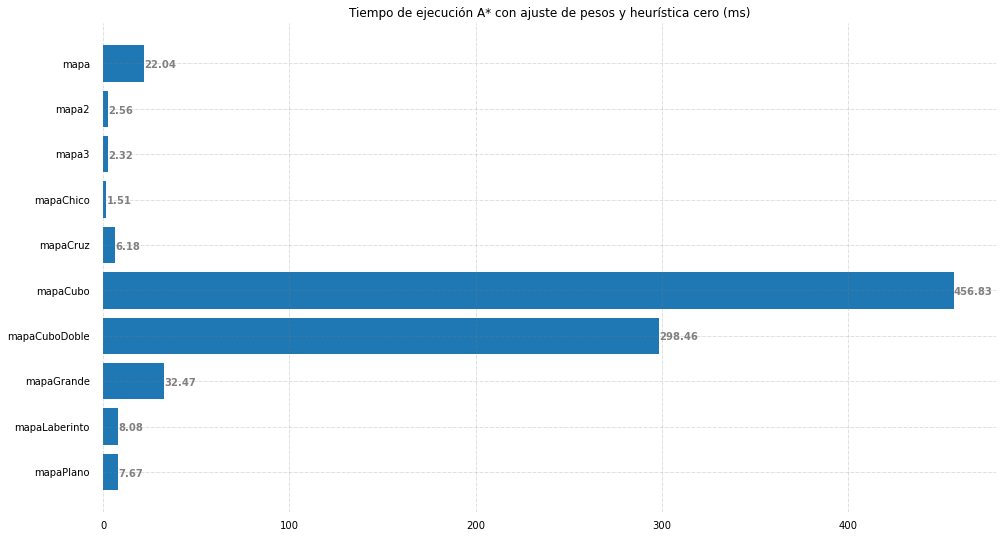

In [14]:
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(mapas, cea)
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.5)
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight ='bold', color ='grey')
ax.set_title('Tiempo de ejecución A* con ajuste de pesos y heurística cero (ms)', loc ='center')
plt.show()

Por lo general se aprecian unos tiempos elevados en todos los mapas, ninguno baja del milisegundo. Más adelante cuando se analicen el resto de heurísticas se podrá apreciar mejor la lentitud de esta.

Para apreciar mejor las diferencias entre un algoritmo y otro, veamoslo en un gráfico:

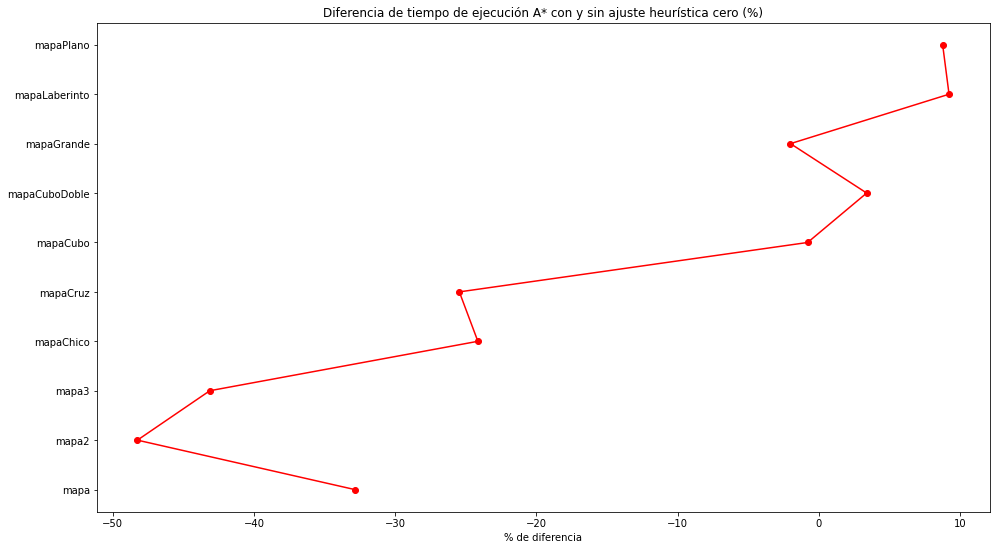

In [15]:
dif = []
for i in range(len(ce)):
  dif.append((ce[i] - cea[i])*100/cea[i])
plt.figure(figsize=(16,9))
plt.plot(dif, mapas, 'r-o')
plt.xlabel('% de diferencia')
plt.title("Diferencia de tiempo de ejecución A* con y sin ajuste heurística cero (%)")
plt.show()

Este gráfico muestra la diferencia entre el tiempo del algoritmo sin ajuste de peso menos el tiempo del algoritmo con ajuste en porcentaje del segundo. Esto quiere decir que los resultados positivos son en los que el ajuste de peso mejora el tiempo de ejecución. Es importante ver que en el caso de esta heurística, el ajuste de pesos contribuye a mejorar el rendimiento, aunque conforme los mapas son más complejos, menos mejora vemos de rendimiento e incluso lastre.

A continuación se muestra el número de nodos explorados por el algoritmo con la heurística cero:

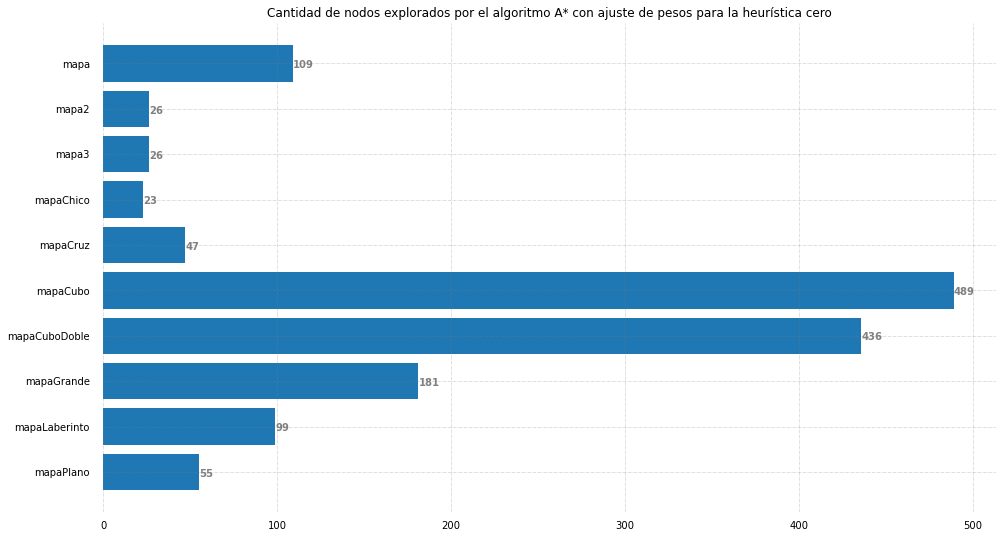

In [16]:
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(mapas, nce)
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.5)
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight ='bold', color ='grey')
ax.set_title('Cantidad de nodos explorados por el algoritmo A* con ajuste de pesos para la heurística cero', loc ='center')
plt.show()

Se puede apreciar la correlación entre el número de nodos explorados y el tiempo de ejecución, sin embargo, la complejidad temporal es exponencial al número de nodos explorados.

La heurística cero es admisible, pues no sobreestima h*, pero dista mucho de estimarla correctamente. Es por ello que debe explorar tantos nodos y generar tanto coste temporal.

### Heurística diagonal

Para el cálculo de h mediante la heurística diagonal, se emplea la siguiente fórmula:
>$$
d(A, B) = max(|X_{A} - X_{B}|, |Y_{A} - Y_{B}|) 
$$

Esta es, el maximo de las diferencias absolutas de las coordenadas. Esta estimación, a pesar de su nombre, subestima las casillas diagonales, esto es, que para un movimiento en diagonal único, el valor de h será 1 mientras que h* es 1,5.

Aún así, esta heurística es bastante más eficiente que la heurística cero. Así podemos verlo a continuación:

In [17]:
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(mapas, di)
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.5)
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight ='bold', color ='grey')
ax.set_title('Tiempo de ejecución A* con heurística diagonal (ms)', loc ='center')
plt.show()

A continuación la gráfica para el algoritmo con ajuste de pesos:

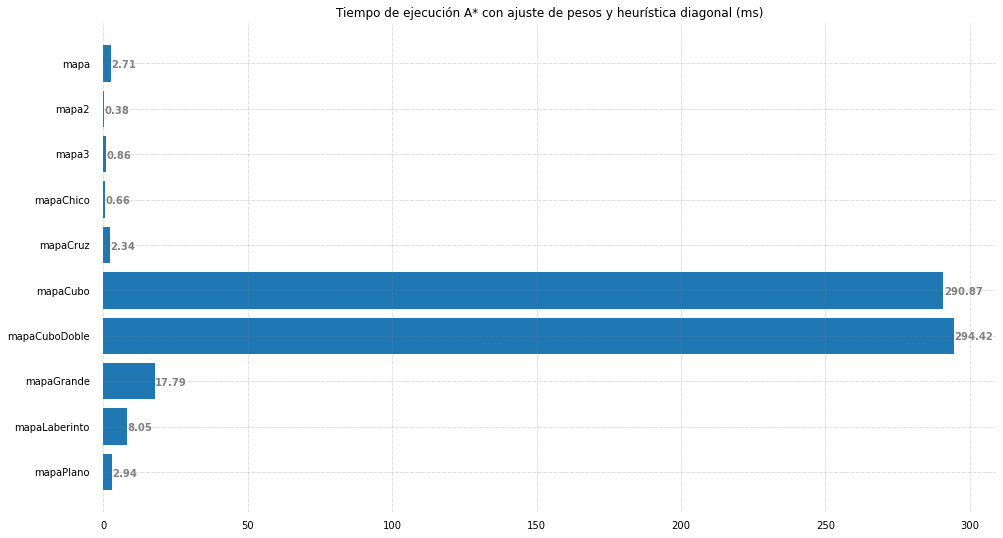

In [18]:
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(mapas, dia)
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.5)
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight ='bold', color ='grey')
ax.set_title('Tiempo de ejecución A* con ajuste de pesos y heurística diagonal (ms)', loc ='center')
plt.show()

Como veremos a continuación con la gráfica comparativa, parece que para esta heurística funciona mejor el algoritmo sin ajuste en los mapas complejos.

In [19]:
dif = []
for i in range(len(di)):
  dif.append((di[i] - dia[i])*100/dia[i])
plt.figure(figsize=(16,9))
plt.plot(dif, mapas, 'r-o')
plt.xlabel('% de diferencia')
plt.title("Diferencia de tiempo de ejecución A* con y sin ajuste heurística diagonal (%)")
plt.show()

Se puede apreciar que el algoritmo con ajuste de pesos para esta heurística acelera el proceso en algunos mapas, pero para los más complejos, no es así. 

Para analizar la cantidad de nodos explorados, usaremos la siguiente gráfica:

In [20]:
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(mapas, ndi)
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.5)
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight ='bold', color ='grey')
ax.set_title('Cantidad de nodos explorados por el algoritmo A* con ajuste de pesos para la heurística diagonal', loc ='center')
plt.show()

Vemos que por lo general la cantidad de nodos explorados disminuye respecto a al heurística cero, aunque sigue siendo alta. Al igual que antes, la complejidad temporal es exponencial al número de nodos, y podemos aquí verlo reflejado.

Comparemos ahora la mejora temporal que supone implementar esta heurística respecto a la cero:

In [21]:
dif = []
difa = []
for i in range(len(di)):
  dif.append((ce[i] - di[i])*100/di[i])
  difa.append((cea[i] - dia[i])*100/dia[i])

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 9))
ax1.plot(dif, mapas, '-o', label='A*')
ax1.set_title("Diferencia temporal entre la heurística cero y la diagonal (% de mejora)")
ax2.plot(difa, mapas, 'r-o', label='A* con ajuste')
f.legend()
plt.show()

Salvo en el caso del mapaCuboDoble para el algoritmo con ajuste de pesos, todas y cada una del resto de pruebas muestran un espectacular mejor rendimiento con la heurística diagonal, llegando a más del 400% en el caso del mapa y de un 700% para el algoritmo con ajuste de pesos.

Para la cantidad de nodos:

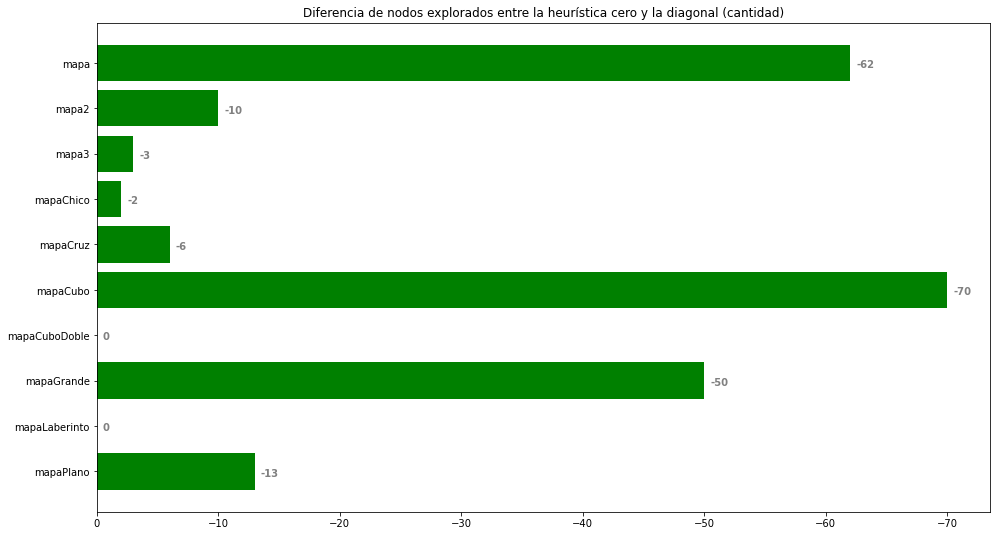

In [22]:
dif = []
for i in range(len(ndi)):
  dif.append(ndi[i] - nce[i])
f, ax= plt.subplots(figsize=(16, 9))
ax.barh(mapas, dif, color='g')
for i in ax.patches:
    plt.text(i.get_width()-0.5, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight ='bold', color ='grey')
ax.invert_yaxis()
ax.invert_xaxis()
ax.set_title("Diferencia de nodos explorados entre la heurística cero y la diagonal (cantidad)")
plt.show()

A partir de esta gráfica podemos ver la reducción de nodos explorados al implementar la heurística diagonal respecto de la cero. Como vemos hay una notable reducción en los mapas mas complejos como mapa, mapaCubo o mapaGrande.

Esta heurística es admisible, subestima el coste de alcanzar el objetivo. Además es muestralmente mejor que la heurística cero.

### Heurística Manhattan

En esta heurística h equivale a la distancia calculada como la suma de las diferencias absolutas de las coordenadas de la celda origen y de la celda destino. Formulado así:

>$$
d(A, B) = |X_{A} - X_{B}| + |Y_{A} - Y_{B}|
$$

Esta heurística no es admisible, pues para algunos nodos, h será superior a h*. La distancia Manhattan no tiene en cuenta el movimiento en diagonal que sí hay en la práctica y este es el motivo por el cual sobreestima el coste. Sin embargo vamos a realizar igualmente el análisis de esta heurística.

Veamos que tiempos ha obtenido el algoritmo para esta heurística:

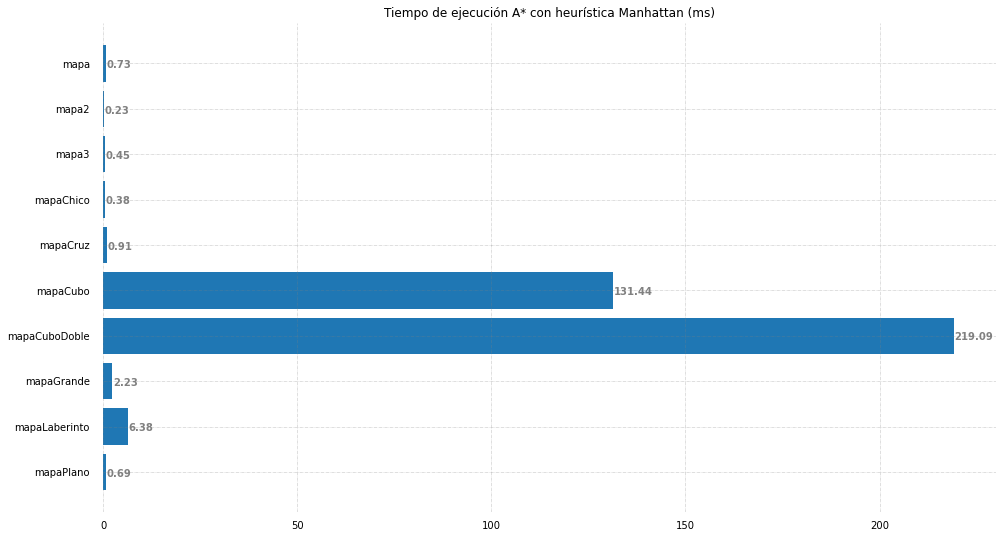

In [23]:
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(mapas, ma)
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.5)
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight ='bold', color ='grey')
ax.set_title('Tiempo de ejecución A* con heurística Manhattan (ms)', loc ='center')
plt.show()

Para el algoritmo sin ajuste de pesos, la mejora temporal es muy notable respecto a la heurística diagonal. Para el mapaCuboDoble, a pesar de que hay mejora, esta no es tan notoria como el resto de mapas.

A continuación los datos obtenidos para el A* con ajuste de pesos:

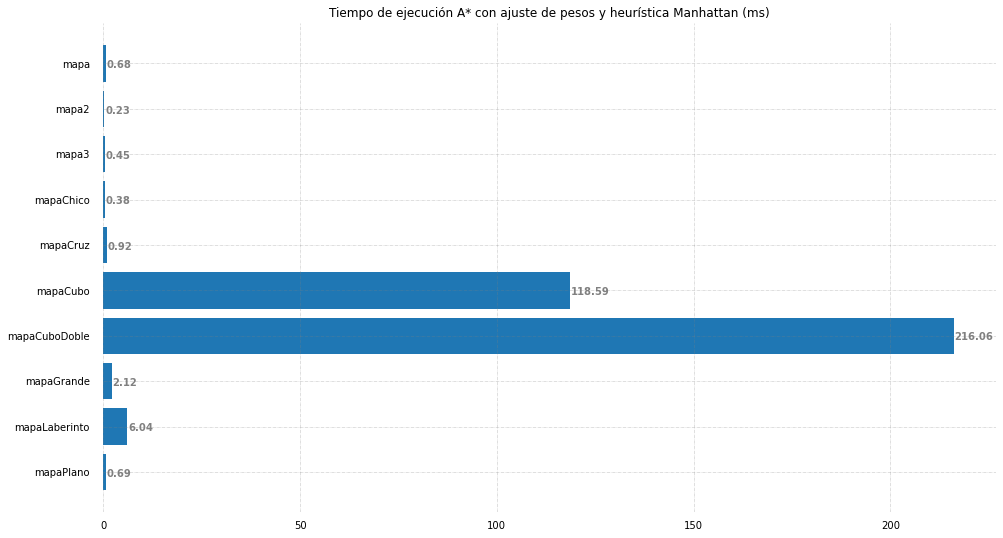

In [24]:
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(mapas, maa)
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.5)
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight ='bold', color ='grey')
ax.set_title('Tiempo de ejecución A* con ajuste de pesos y heurística Manhattan (ms)', loc ='center')
plt.show()

Al igual que en el otro algoritmo, se aprecia una notable mejora respecto a la anterior heurística, pero además en este, también vemos que mejora mucho los tiempos al aplicar el ajuste de pesos. Comparemoslos:

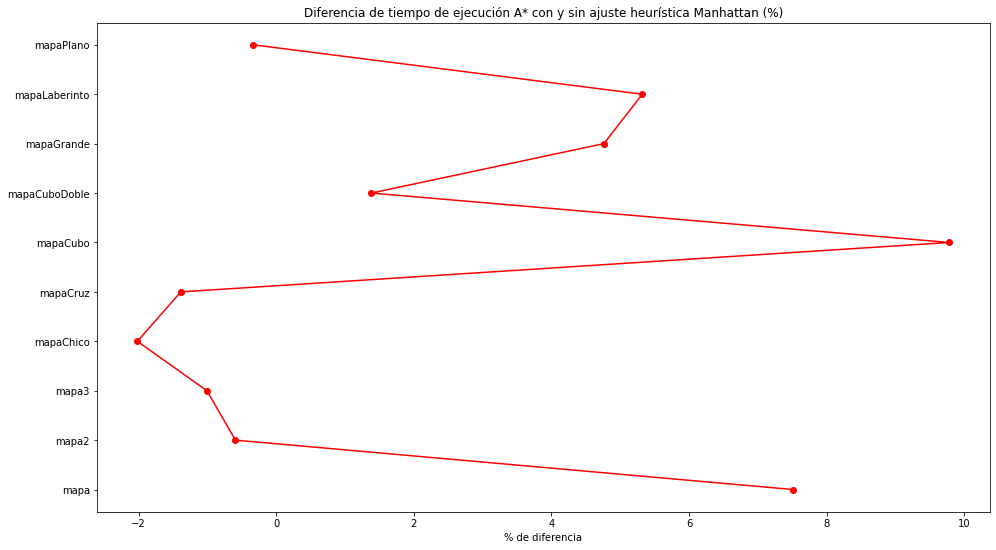

In [25]:
dif = []
for i in range(len(di)):
  dif.append((ma[i] - maa[i])*100/ma[i])
plt.figure(figsize=(16,9))
plt.plot(dif, mapas, 'r-o')
plt.xlabel('% de diferencia')
plt.title("Diferencia de tiempo de ejecución A* con y sin ajuste heurística Manhattan (%)")
plt.show()

Hay una mejora temporal en todos los mapas, exceptuando los mapas sencillos. Para estos mapas en los que parece empeorar, este deterioro de eficiencia es, como vemos, reducido (entre un 0% y 3%).

Veamos ahora la cantidad de nodos explorados:

In [26]:
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(mapas, nma)
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.5)
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight ='bold', color ='grey')
ax.set_title('Cantidad de nodos explorados por el algoritmo A* con ajuste de pesos para la heurística Manhattan', loc ='center')
plt.show()

La cantidad de nodos explorados mediante esta heurística es menor aún que usando la heurística diagonal, en todos los mapas se ha reducido mucho el número.

Comparemos ahora la heurística Manhattan con la mejor obtenida hasta ahora, la diagonal:

In [27]:
dif = []
difa = []
for i in range(len(di)):
  dif.append((di[i] - ma[i])*100/ma[i])
  difa.append((dia[i] - maa[i])*100/maa[i])

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16,9))
ax1.plot(dif, mapas, '-o', label='A*')
ax1.set_title("Diferencias entre la heurística diagonal y la Manhattan (% de mejora)")
ax2.plot(difa, mapas, 'r-o', label='A* con ajuste')
f.legend()
plt.show()

Podemos apreciar que el porcentaje de mejora implementando esta heurística es abrumador en todos los casos. El único que no ha mejorado es, para el algoritmo sin ajuste, el mapaCuboDoble, pero con el algoritmo con ajuste de pesos esta falta puede compensarse.

Ahora la reducción de nodos explorados:

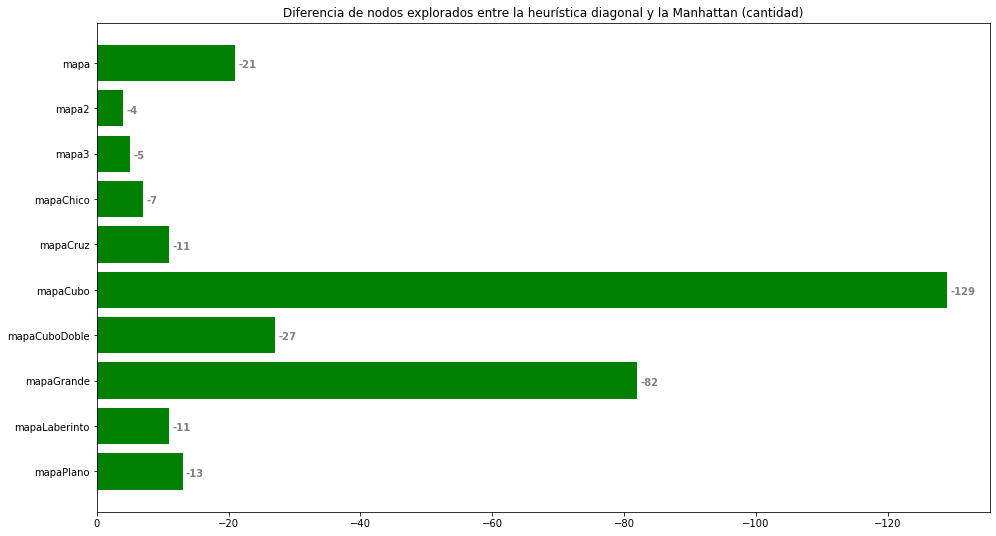

In [28]:
dif = []
for i in range(len(nma)):
  dif.append(nma[i] - ndi[i])
f, ax= plt.subplots(figsize=(16, 9))
ax.barh(mapas, dif, color='g')
for i in ax.patches:
    plt.text(i.get_width()-0.5, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight ='bold', color ='grey')
ax.invert_yaxis()
ax.invert_xaxis()
ax.set_title("Diferencia de nodos explorados entre la heurística diagonal y la Manhattan (cantidad)")
plt.show()

A partir de esta gráfica podemos ver la reducción de nodos explorados al implementar la heurística Manhattan respecto de la diagonal. Como vemos hay una notable reducción en los mapas mas complejos como mapa, mapaCubo, mapaGrande, y a diferencia del caso anterior en que mapaCuboDoble no había reducido el número de nodos explorados, en este caso sí ha sucedido.

Esta heurística no es admisible pues para algunos casos sobreestima el coste de alcanzar el objetivo, lo que nos hará descartarla. Para los problemas empleados no se ha dado el caso de que no obtenga el camino óptimo, pero sí puede darse el caso. Por otro lado, al estimar a la alza el objetivo, explora una cantidad menor de nodos y tarda menos en ejecutarse, como así demuestran las gráficas anteriores.

### Heurística euclidea

Para la heurística euclidea, la distancia se calcula mediante la siguiente fórmula:

>$$
d(A, B) = \sqrt{(X_{A} - X_{B})^2 + (Y_{A} - Y_{B})^2}
$$

Esta formula equivale al teorema de Pitagoras siendo la distancia a obtener la hipotenusa del triangulo imaginario. Esta heurística sí es admisible, pues cumple que: 

$$ \forall n: h(n) \leqslant h*(n) $$

El valor de h* para las diagonales es de 1.5, mientras que con esta heurística el valor de h será raíz de 2 (≈1.4142) y por tanto menor que h*.

A continuación analizaremos los tiempos de ejecución:

In [29]:
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(mapas, eu)
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.5)
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight ='bold', color ='grey')
ax.set_title('Tiempo de ejecución A* con heurística euclidea (ms)', loc ='center')
plt.show()

En esta tabla de tiempos vemos que son bastante reducidos, sobretodo los mapas pequeños, cuyo coste es realmente bajo. Los mapas más complejos también parecen haber reducido su coste temporal respecto a la heurística diagonal.

Para el algoritmo con ajuste de pesos:

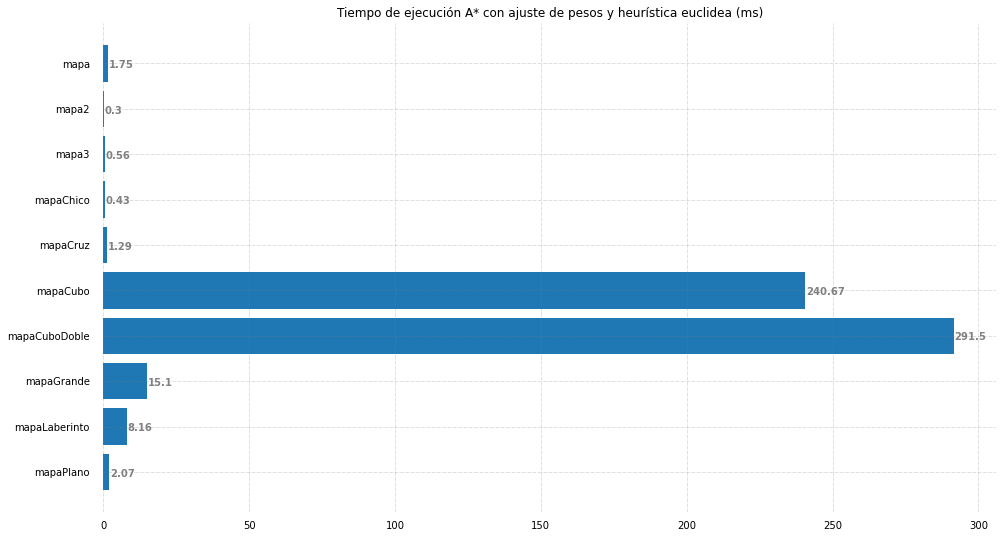

In [30]:
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(mapas, eua)
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.5)
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight ='bold', color ='grey')
ax.set_title('Tiempo de ejecución A* con ajuste de pesos y heurística euclidea (ms)', loc ='center')
plt.show()

Los tiempos aún se reducen más introduciendo el ajuste de pesos a esta heurística, excepto para el mapaGrande, que aumenta aunque muy poco.

Veamoslo en detalle:

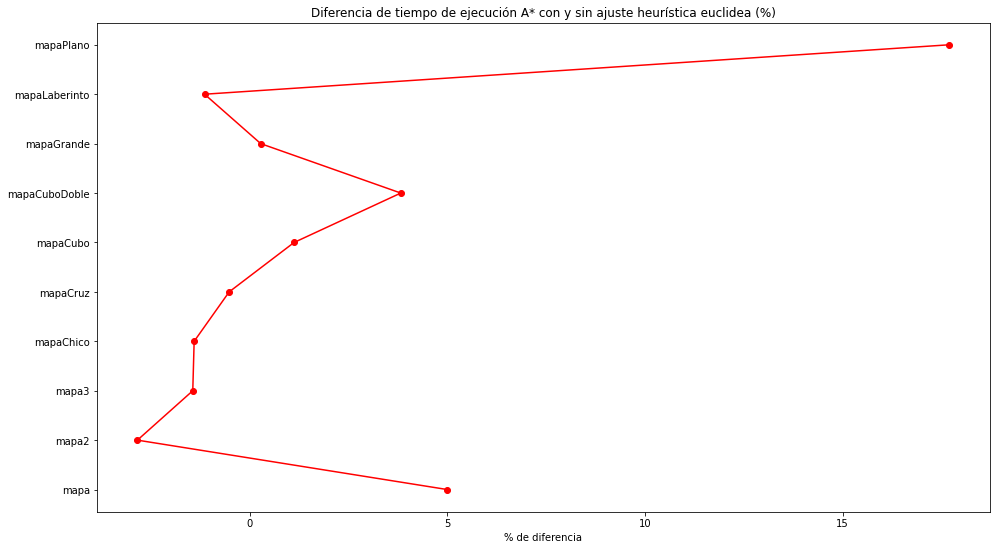

In [31]:
dif = []
for i in range(len(di)):
  dif.append((eu[i] - eua[i])*100/eua[i])
plt.figure(figsize=(16,9))
plt.plot(dif, mapas, 'r-o')
plt.xlabel('% de diferencia')
plt.title("Diferencia de tiempo de ejecución A* con y sin ajuste heurística euclidea (%)")
plt.show()

Hay una mejora temporal en los mapas complejos notable, y en los sencillos un empeoramiento muy leve, exceptuando mapaPlano, que mejora más de un 15%

Veamos ahora la cantidad de nodos explorados:

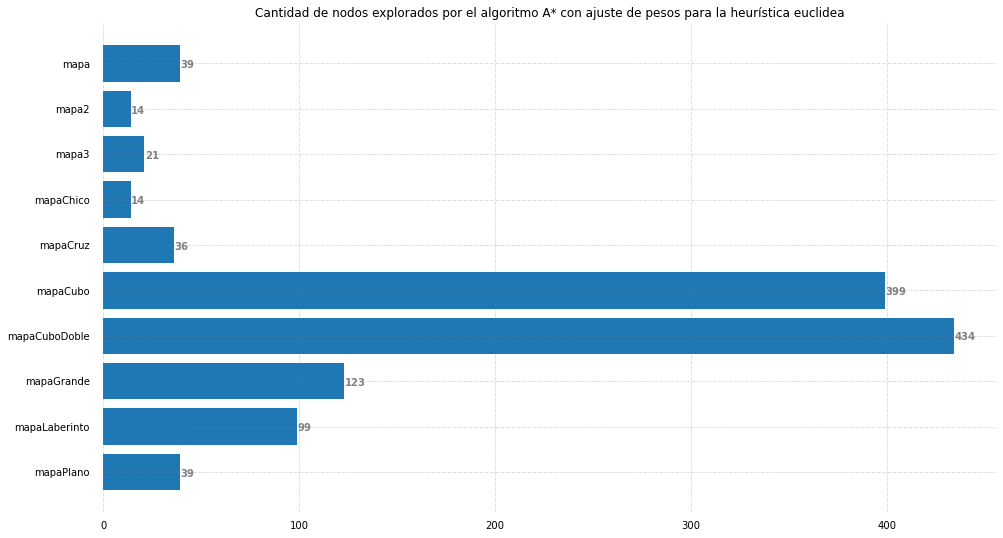

In [32]:
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(mapas, neu)
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.5)
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight ='bold', color ='grey')
ax.set_title('Cantidad de nodos explorados por el algoritmo A* con ajuste de pesos para la heurística euclidea', loc ='center')
plt.show()

La cantidad de nodos explorados mediante esta heurística es menor aún que usando la heurística diagonal, en todos los mapas se ha reducido de manera notable el número de ellos.

Comparemos ahora esta heurística con la diagonal, que es la mejor de las que hemos determinado admisibles:

In [33]:
dif = []
difa = []
for i in range(len(di)):
  dif.append((di[i] - eu[i])*100/eu[i])
  difa.append((dia[i] - eua[i])*100/eua[i])

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16,9))
ax1.plot(dif, mapas, '-o', label='A*')
ax1.set_title("Diferencias entre la heurística diagonal y la euclidea (% de mejora)")
ax2.plot(difa, mapas, 'r-o', label='A* con ajuste')
f.legend()
plt.show()

Podemos apreciar que el porcentaje de mejora implementando esta heurística es realmente bueno en todos los casos menos para el mapaCuboDoble en el algoritmo sin ajuste. Para el algoritmo con ajuste de pesos vemos un incremento de al menos casi el 20% para todos los mapas, exceptuando el mapaLaberinto y el mapaCuboDoble.

Ahora la reducción de nodos explorados:

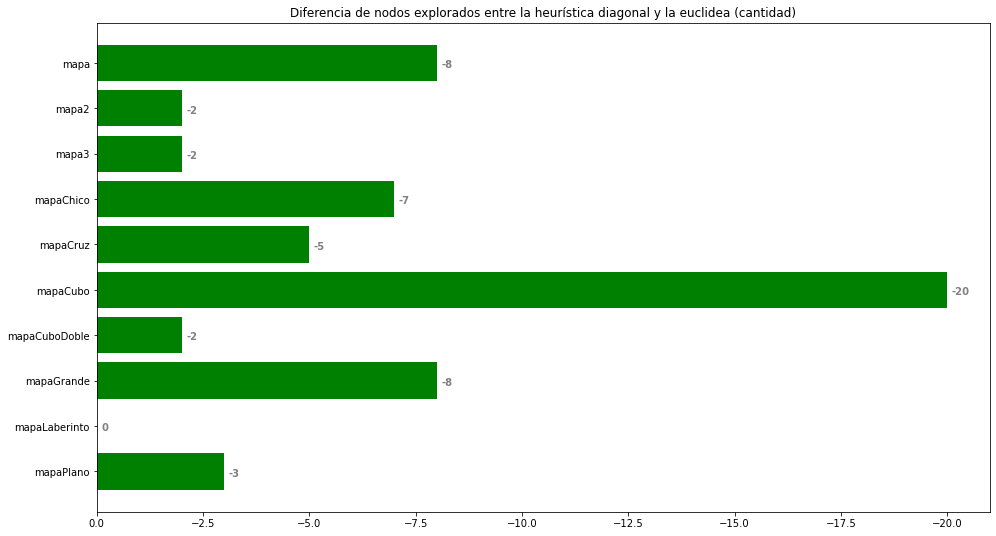

In [34]:
dif = []
for i in range(len(neu)):
  dif.append(neu[i] - ndi[i])
f, ax= plt.subplots(figsize=(16, 9))
ax.barh(mapas, dif, color='g')
for i in ax.patches:
    plt.text(i.get_width() - 0.1, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight ='bold', color ='grey')
ax.invert_yaxis()
ax.invert_xaxis()
ax.set_title("Diferencia de nodos explorados entre la heurística diagonal y la euclidea (cantidad)")
plt.show()

A partir de esta gráfica podemos ver la reducción de nodos explorados al implementar la heurística euclidea respecto de la diagonal. Hay una reducción en todos los mapas menos el mapaLaberinto, destacando la reducción de nodos del mapaCubo.

Tras esta comparativa, podemos afirmar que la immplementación de la heurística euclidea mejora el funcionamiento del algoritmo y además esta es admisible.

### Heurística Minkowski

La última heurística a analizar es la Minkowski. Para esta heurística calculamos la distancia con la siguiente fórmula:

>$$
  d(A, B) = \sqrt[z]{(X_{A} - X_{B})^z + (Y_{A} - Y_{B})^z}
$$

Este cálculo como se puede ver, es una generalización de la distancia euclidea para un valor z. En este caso se ha tomado como valor z = 1.718, por lo que quedaría así:

>$$
  d(A, B) = \sqrt[1.718]{(X_{A} - X_{B})^{1.718} + (Y_{A} - Y_{B})^{1.718}}
$$

Puede que este número sea aleatorio, pero es un número que cumple lo siguiente:

$$ 
  \sqrt[1.718]{1^{1.718} + 1^{1.718}} ≈ 1.5
$$

Esto es importante en tanto que, la heurística no pierde la admisibilidad y aproxima de manera más certera h*. El problema es que tiene un coste computacional mayor, y para problemas pequeños supondrá lastrar la eficiencia.

Vemos los tiempos de ejecución:

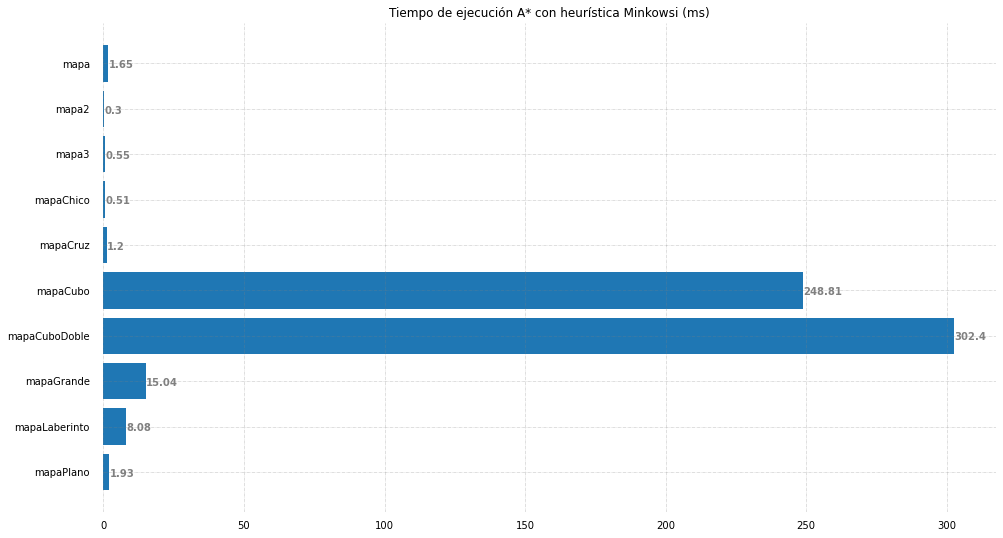

In [35]:
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(mapas, mi)
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.5)
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight ='bold', color ='grey')
ax.set_title('Tiempo de ejecución A* con heurística Minkowsi (ms)', loc ='center')
plt.show()

Podemos ver que estos son bastante reducidos, aunque veamos a continuación los tiempos obtenidos mediante el algoritmo con ajuste de pesos:

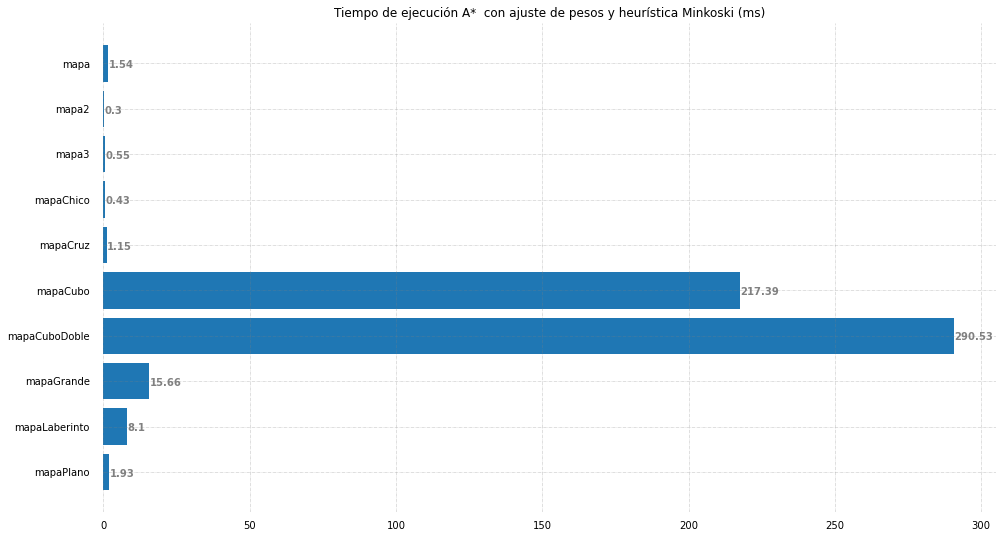

In [36]:
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(mapas, mia)
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.5)
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight ='bold', color ='grey')
ax.set_title('Tiempo de ejecución A*  con ajuste de pesos y heurística Minkoski (ms)', loc ='center')
plt.show()

Para compararlos correctamente veamos el siguiente gráfico:

In [37]:
dif = []
for i in range(len(mi)):
  dif.append((mi[i] - mia[i])*100/mia[i])
plt.figure(figsize=(16,9))
plt.plot(dif, mapas, 'r-o')
plt.xlabel('% de diferencia')
plt.title("Diferencia de tiempo de ejecución A* con y sin ajuste heurística Minkowski (%)")
plt.show()

Hay una mejora temporal, de nuevo, en los mapas más complejos a excepción del mapaGrande que amplia el coste temporal casi un 5%, y para los mapas pequeños a penas hay variación aunque vemos que el mapaChico mejora casi un 20%.

Veamos ahora la cantidad de nodos explorados:

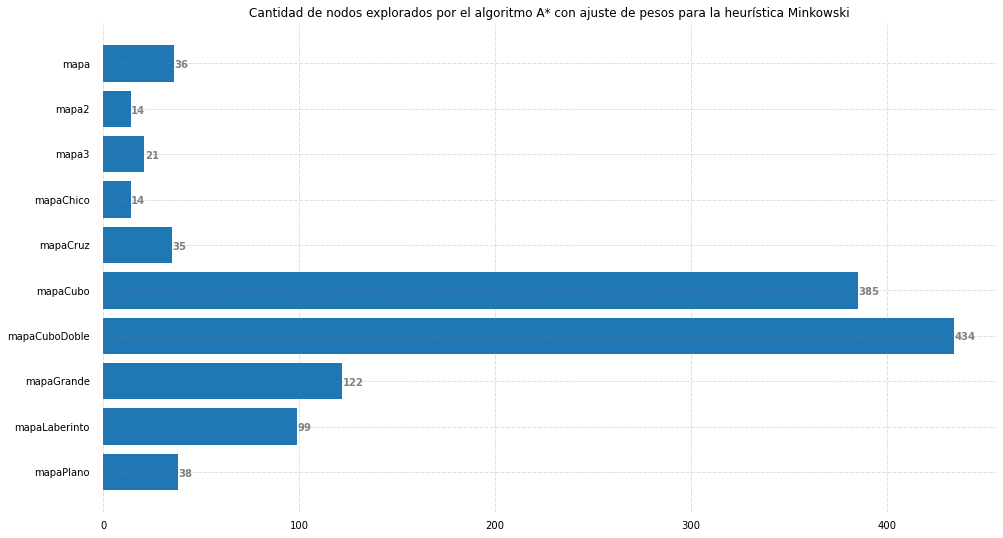

In [38]:
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(mapas, nmi)
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.5)
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight ='bold', color ='grey')
ax.set_title('Cantidad de nodos explorados por el algoritmo A* con ajuste de pesos para la heurística Minkowski', loc ='center')
plt.show()

La cantidad de nodos explorados mediante esta heurística es menor aún que usando la heurística euclidea. Comparemos estas dos heurísticas:

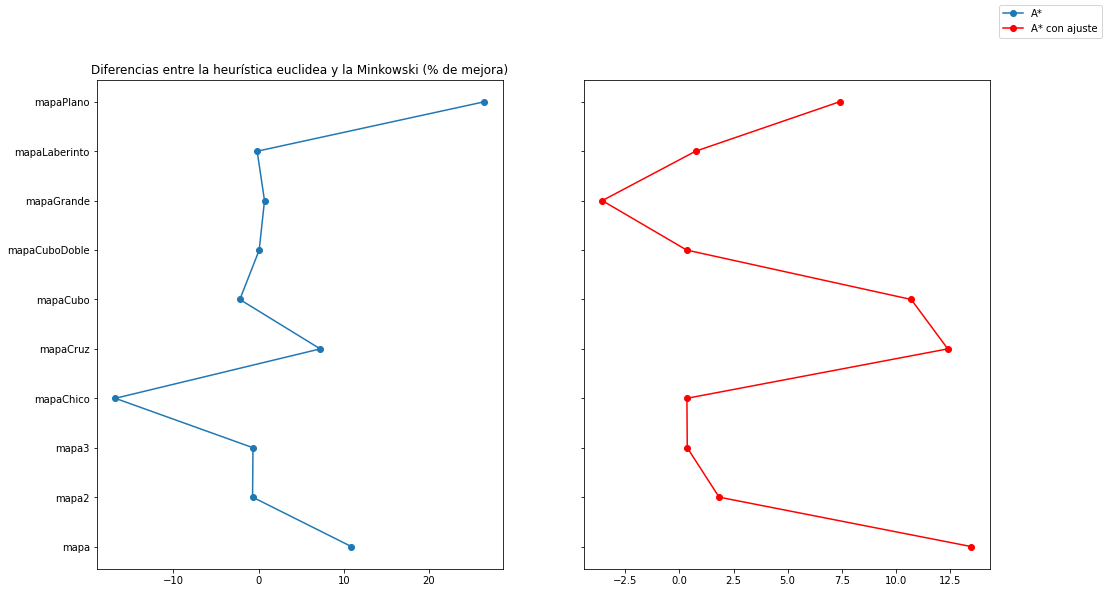

In [39]:
dif = []
difa = []
for i in range(len(di)):
  dif.append((eu[i] - mi[i])*100/mi[i])
  difa.append((eua[i] - mia[i])*100/mia[i])

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16,9))
ax1.plot(dif, mapas, '-o', label='A*')
ax1.set_title("Diferencias entre la heurística euclidea y la Minkowski (% de mejora)")
ax2.plot(difa, mapas, 'r-o', label='A* con ajuste')
f.legend()
plt.show()

Para el algoritmo sin ajuste de pesos la diferencia no es notoria, la mayor parte de las diferencias temporales se situan en torno al 0%, exceptuando algunos casos que mejora o empeora. Sin embargo, mediante el ajuste de pesos, vemos que los mapas complejos mejoran bastante.

Ahora la reducción de nodos explorados:

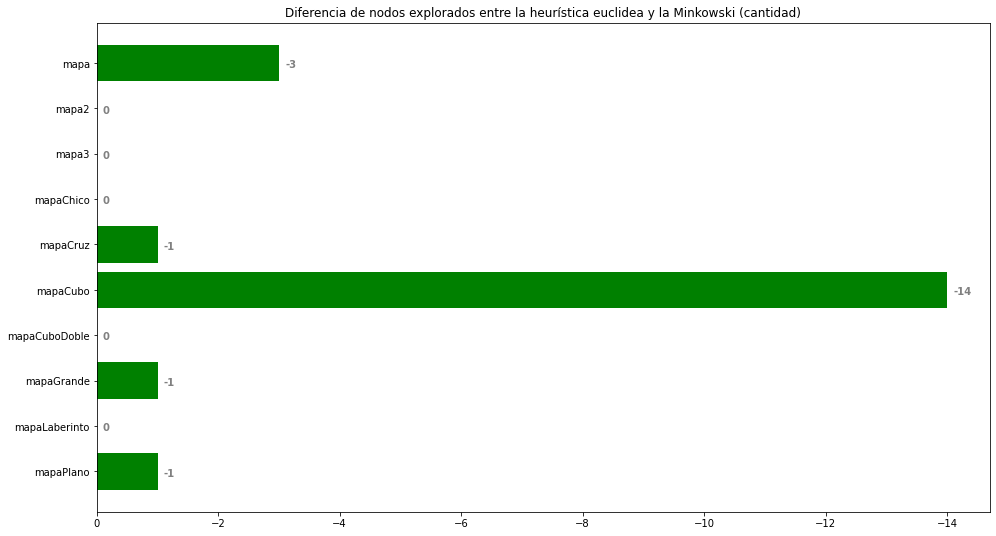

In [40]:
dif = []
for i in range(len(nmi)):
  dif.append(nmi[i] - neu[i])
f, ax= plt.subplots(figsize=(16, 9))
ax.barh(mapas, dif, color='g')
for i in ax.patches:
    plt.text(i.get_width()-0.1, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight ='bold', color ='grey')
ax.invert_yaxis()
ax.invert_xaxis()
ax.set_title("Diferencia de nodos explorados entre la heurística euclidea y la Minkowski (cantidad)")
plt.show()

A partir de este gráfico vemos que para algunos mapas reduce levemente el número de nodos explorados y para otros queda igual. El mapaCubo es el que más reduce el número de nodos siendo esta disminución de 14.

A pesar de la mejora en términos de exploración de nodos, el algoritmo sin ajuste de pesos para la heurística Minkowski no consigue mejorar temporalmente la heurística euclidea. Esto puede deberse a que el coste computacional de calcular esta heurística es más elevado y consigue que la mejora no se aprecie. Por otro lado, el algoritmo con ajuste de pesos, vemos que, al paliar los costes computacionales excesivos,consigue solucionar este problema y sí realiza una mejora temporal.

La mejor de las heurísticas analizadas, como hemos visto con el análisis, es la Minkowski, pues es la que mejor estima el valor de h* y como hemos podido observar, obtiene mejores resultados en cuanto a exploración de nodos y coste temporal. La heurística Manhattan es prometedora, pero al no ser admisible ha sido descartada. Para un problema en el que no se admitieran movimientos diagonales, esta hubiera sido la idonea.

## Análisis de A* con ajuste de pesos en función de w

Todos los analisis y procedimientos previos realizados han utilizado como valor de ajuste de pesos (w) 0.5. Ahora realizaremos un analisis en que se varíe este valor. Se va a utilizar la heurística Minkowski, pues es la que mejores resultados nos ha dado, y los mapas mapa, mapaChico y mapaCubo. Los valores de w que se van a utilizar son: 0.2, 0.5 y 0.8.

La técnica del ajuste de pesos se realiza de la siguiente forma:
>$$
  f_{w}(n) = (1-w)g(n)+wh(n)
$$

Esto nos muestra que, a mayor valor de w, más se tendrá en cuenta h y menos g.
Puesto que nuestra heurística es admisible, en los valores entre 0 y 0.5 para w, también será admisible el ajuste. Pero para los valores mayores que 0.5, dependiendo de la diferencia entre h y h*, puede ser que se pierda admisibilidad.

Para realizar el análisis se ha desarrollado otro test, que ejecuta el test de tiempo y el de nodos explorados. Este test almacena los resultados en el fichero analisis-w.txt.


In [41]:
def anw(fi):
    nord = [orden[0], orden[3], orden[5]]
    for x, y in nord:
        wname = ''
        for l in x:
            if l == '.':
                break
            wname += l
            if l == '/':
                wname = ''
        fi.write(wname)
        fi.write(' ')
    fi.write('\n')
    Nodo.heuristicaSelec = 'mi'
    for w in [0.2, 0.5, 0.8]:
        NodoAjustado.w = w
        fi.write(str(w) + 't' + ' ')
        for file, casilla in nord: # Para cada mapa y su casilla destino
            media = 0
            for i in range(10): # se ejecuta 10 veces
                media += testiempo(casilla, file, True)
            fi.write(str(media / 10) + " ") # se almacena el tiempo medio de ejecución
        fi.write('\n')
        fi.write(str(w) + 'n' + ' ')
        for file, casilla in nord: # Para cada mapa y su casilla destino
            fi.write(str(testnodos(casilla, file)[0]) + " ") # se almacena el tiempo medio de ejecución
        fi.write('\n')

def test3():
    fi = open("Fuente/analisis-w.txt", "w")
    anw(fi)
    fi.close()
    print("Fin test3")

A continuación extraemos los datos del fichero:

In [43]:
anw = open('../Fuente/analisis-w.txt', 'r')
txt = ''
for i in anw:
  txt += i
an.close()
data = txt.split('\n')
mapasw = data[0].split(' ')

w2t = data[1].split(' ')
w2t.remove('0.2t')
for i in range(len(w2t)):
  w2t[i] = float(w2t[i])

w2n = data[2].split(' ')
w2n.remove('0.2n')
for i in range(len(w2n)):
  w2n[i] = int(w2n[i])

w5t = data[3].split(' ')
w5t.remove('0.5t')
for i in range(len(w5t)):
  w5t[i] = float(w5t[i])

w5n = data[4].split(' ')
w5n.remove('0.5n')
for i in range(len(w5n)):
  w5n[i] = int(w5n[i])

w8t = data[5].split(' ')
w8t.remove('0.8t')
for i in range(len(w8t)):
  w8t[i] = float(w8t[i])

w8n = data[6].split(' ')
w8n.remove('0.8n')
for i in range(len(w8n)):
  w8n[i] = int(w8n[i])

### Análisis con w = 0.2

Nuestra función de ajuste en este caso será:
>$$
  f_{0.2}(n) = 0.8g(n)+0.2h(n)
$$

Esto implica que el algoritmo tendrá más en cuenta la distancia respecto del inicio en mayor medida que la estimación hasta el objetivo.

Veamos el tiempo que necesita el algoritmo para ejecutar los problemas propuestos y la cantida de nodos que este explora:

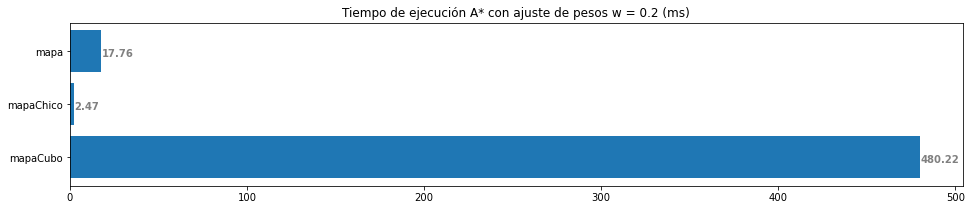

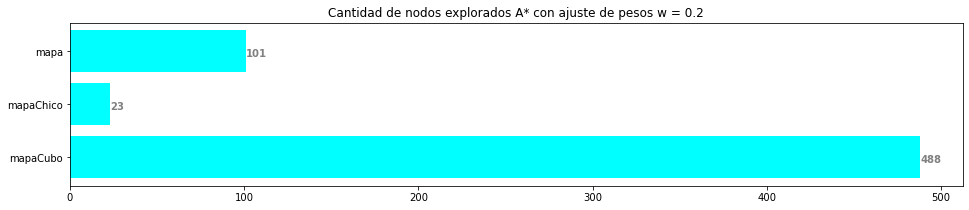

In [44]:
fig, ax = plt.subplots(figsize =(16, 3))
ax.barh(mapasw, w2t)
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight ='bold', color ='grey')
ax.set_title('Tiempo de ejecución A* con ajuste de pesos w = 0.2 (ms)', loc ='center')
plt.show()
fig, ax = plt.subplots(figsize =(16, 3))
ax.barh(mapasw, w2n, color='cyan')
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight ='bold', color ='grey')
ax.set_title('Cantidad de nodos explorados A* con ajuste de pesos w = 0.2', loc ='center')
plt.show()

Como dato, vemos que ambas gráficas siguen una proporción similar. Si comparamos los datos obtenidos con los que vimos en el análisis de heurísticas, estos datos son muy malos, siendo incluso peor que la heurística cero. En este caso, eso se debe a que la heurística cero no tiene un coste temporal añadido por realizar el cálculo de h.

### Análisis con w = 0.5

La función de ajuste ahora pasa a ser la siguiente:
>$$
  f_{0.5}(n) = 0.5g(n)+0.5h(n)
$$

A partir de ahora, el algoritmo valorará de igual manera el coste desde el inicio como la estimación hasta el objetivo.

Veamos el tiempo que necesita el algoritmo para ejecutar los problemas propuestos y la cantida de nodos que este explora:

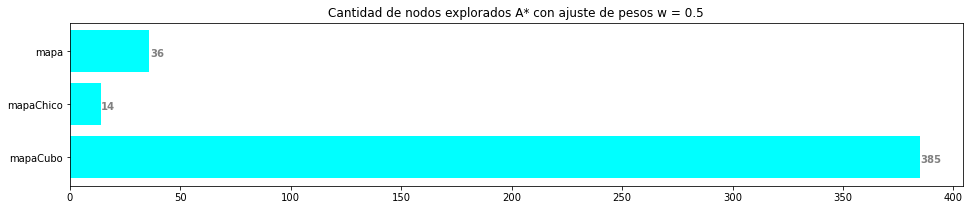

In [45]:
fig, ax = plt.subplots(figsize =(16, 3))
ax.barh(mapasw, w5t)
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight ='bold', color ='grey')
ax.set_title('Tiempo de ejecución A* con ajuste de pesos w = 0.5 (ms)', loc ='center')
plt.show()
fig, ax = plt.subplots(figsize =(16, 3))
ax.barh(mapasw, w5n, color='cyan')
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight ='bold', color ='grey')
ax.set_title('Cantidad de nodos explorados A* con ajuste de pesos w = 0.5', loc ='center')
plt.show()

Vemos una muy considerable mejora de los resultados, tanto los tiempos como los nodos se han reducido enormemente. Observemoslo mejor:

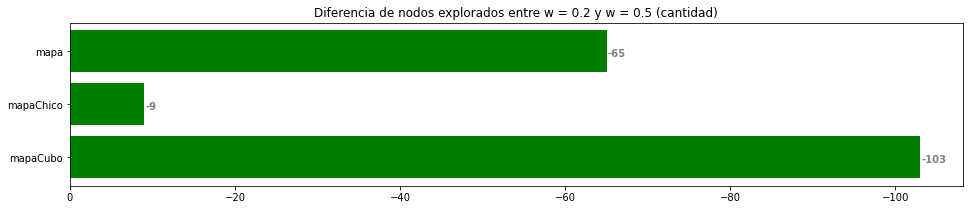

In [46]:
dif = []
for i in range(len(w2t)):
  dif.append((w2t[i] - w5t[i])*100/w5t[i])
f, ax = plt.subplots(figsize=(16,3))
ax.invert_yaxis()
ax.plot(dif, mapasw, '-o')
ax.set_title("Diferencia temporal entre w = 0.2 y w = 0.5 (% de mejora)")
plt.show()
dif = []
for i in range(len(w2n)):
  dif.append(w5n[i] - w2n[i])
f, ax= plt.subplots(figsize=(16, 3))
ax.barh(mapasw, dif, color='g')
for i in ax.patches:
    plt.text(i.get_width()-0.1, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight ='bold', color ='grey')
ax.invert_yaxis()
ax.invert_xaxis()
ax.set_title("Diferencia de nodos explorados entre w = 0.2 y w = 0.5 (cantidad)")
plt.show()

Mejoras abrumadoras, reducción temporal de un 900% para el mapa y reducciones de nodos muy grandes para todos ellos.

Hasta aquí estamos dentro del límite de la admisibilidad. Y además hemos obtenido unos excelentes resultados con w = 0.5.

### Análisis con w = 0.8

La nueva función de ajuste es la siguiente:
>$$
  f_{0.8}(n) = 0.2g(n)+0.8h(n)
$$

El algoritmo valorará ahora en menor medidad el coste desde el inicio y dará mucho valor a la estimación hasta el objetivo.

Veamos el tiempo que necesita el algoritmo para ejecutar los problemas propuestos y la cantida de nodos que este explora:

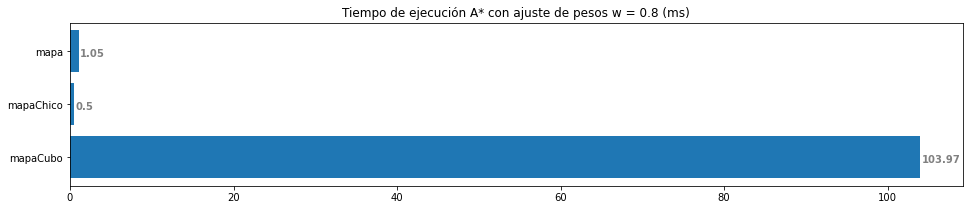

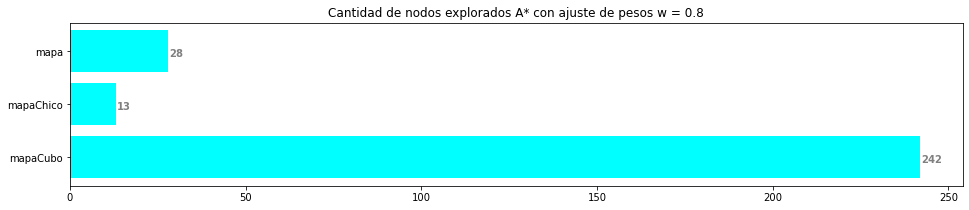

In [47]:
fig, ax = plt.subplots(figsize =(16, 3))
ax.barh(mapasw, w8t)
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight ='bold', color ='grey')
ax.set_title('Tiempo de ejecución A* con ajuste de pesos w = 0.8 (ms)', loc ='center')
plt.show()
fig, ax = plt.subplots(figsize =(16, 3))
ax.barh(mapasw, w8n, color='cyan')
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight ='bold', color ='grey')
ax.set_title('Cantidad de nodos explorados A* con ajuste de pesos w = 0.8', loc ='center')
plt.show()

Para los mapas pequeños hay mejora aunque moderada, pero para el mapaCubo la reducción temporal y de cantidad de nodos explorados es en términos absolutos enorme. Observemoslo mejor:

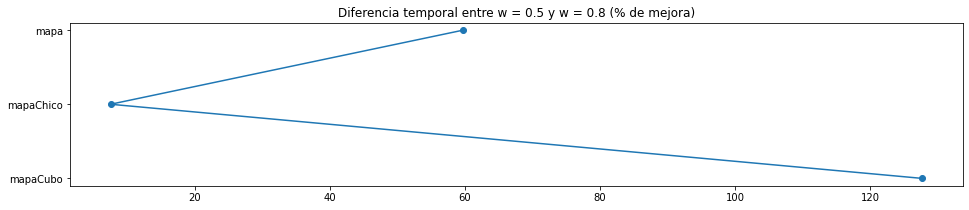

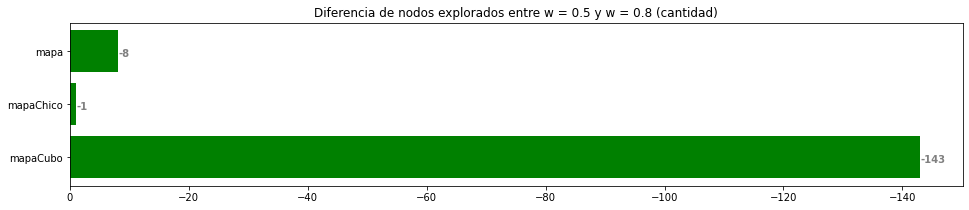

In [48]:
dif = []
for i in range(len(w5t)):
  dif.append((w5t[i] - w8t[i])*100/w8t[i])
f, ax = plt.subplots(figsize=(16,3))
ax.invert_yaxis()
ax.plot(dif, mapasw, '-o')
ax.set_title("Diferencia temporal entre w = 0.5 y w = 0.8 (% de mejora)")
plt.show()
dif = []
for i in range(len(w5n)):
  dif.append(w8n[i] - w5n[i])
f, ax= plt.subplots(figsize=(16, 3))
ax.barh(mapasw, dif, color='g')
for i in ax.patches:
    plt.text(i.get_width()-0.1, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight ='bold', color ='grey')
ax.invert_yaxis()
ax.invert_xaxis()
ax.set_title("Diferencia de nodos explorados entre w = 0.5 y w = 0.8 (cantidad)")
plt.show()

Tanto en términos relativos como absolutos la mejora es grande para el mapa de mayor complejidad.

Para este valor de w no podemos afirmar que sea admisible, pero los problemas probados obtienen el camino óptimo y mejoran en gran medida el rendimiento.

## Mapas utilizados en el desarrollo de la práctica

Se han utiliizado la cantidad de 10 mapas diferentes, los 3 aportados y un 7 desarrollados. Los mapas aportados son:
- mapa

In [50]:
fi = open('../Mundos/mapa.txt', 'r')
txt = ''
for i in fi:
  txt += i
fi.close()
print(txt)

# # # # # # # # # # # # # # # # #
# . . . # . . . . . . # . # . . #
# # # # # . # # # . . . . # . # #
# . . . . . . . . . # . . . . . #
# . # # # . # . # . # . # . # . #
# . # . # . # . # . # . # . # . #
# . # . # . # . # . . # # . # . #
# . # . . . # . # # . # . # . . #
# . . . # # # . . # . . . . . # #
# . . . . . . . # # . # # . . . #
# # # # . # . . . # . # . . # . #
# . . . . # . # . . . # # . # . #
# . # # . # . # O # . . . . . . #
# # # # # # # # # # # # # # # # #





- mapa2


In [51]:
fi = open('../Mundos/mapa2.txt', 'r')
txt = ''
for i in fi:
  txt += i
fi.close()
print(txt)

# # # # # # # # # 
# . # . . . # . #
# . . . # # # . # 
# . . . O . . . #
# # # # . # . . # 
# . . . . # . # # 
# . # # . # . # #
# # # # # # # # # 



- mapa3


In [52]:
fi = open('../Mundos/mapa3.txt', 'r')
txt = ''
for i in fi:
  txt += i
fi.close()
print(txt)

# # # # # # # # # 
# . # . . . # . #
# . # . # # # . # 
# . # . . O . . #
# . . # . # . . # 
# . . . . # . # # 
# . # # . # . # #
# # # # # # # # # 




Y los mapas desarrollados son:
- mapaChico


In [53]:
fi = open('../Mundos/mapaChico.txt', 'r')
txt = ''
for i in fi:
  txt += i
fi.close()
print(txt)

# # # # # # # # # 
# # # # . . # . #
# . . . . . # # # 
# . . # # . . . #
# . # . O # # . # 
# . # . . # . . # 
# . # # . # . # #
# # # # # # # # # 


- mapaCruz


In [54]:
fi = open('../Mundos/mapaCruz.txt', 'r')
txt = ''
for i in fi:
  txt += i
fi.close()
print(txt)

# # # # # # # # # #
# # . . . . . . # #
# . # . . . . # . #
# . . # . . # . . #
# . . . # # . . . #
# . . . # # . . . #
# . . # . . # O . #
# . # . . . . # . #
# # . . . . . . # #
# # # # # # # # # #


- mapaCubo

In [55]:
fi = open('../Mundos/mapaCubo.txt', 'r')
txt = ''
for i in fi:
  txt += i
fi.close()
print(txt)

# # # # # # # # # # # # # # # # # # # # # # # # # 
# . . . . . . . . . . . . . . . . . . . . . . . # 
# . . . . . . . . . . . . . . . . . . . . . . . # 
# . . . . . . . . . . . . . . . . . . . . . . . # 
# . . . . . . . . . . . . . . . . . . . . . . . # 
# . . . . . # # # # # # # # # # # # # . . . . . # 
# . . . . . # . . . . . . . . . . . # . . . . . # 
# . . . . . # . . . . . . . . . . . # . . . . . # 
# . . . . . # . . . . . . . . . . . # . . . . . # 
# . . . . . # . . . . . . . . . . . # . . . . . # 
# . . . . . # . . . . . . . . . . . # . . . . . # 
# . . . . . # . . . . . . . . . . . # . . . . . # 
# . . . . . # . . . . . . . . . . . # . . . . . # 
# . . . . . # . . . . . . . . . . . # . . . . . # 
# . . . . . # . . . . . . . . . . . # . . . . . # 
# . . . . . # . . . . . . . . . . . # . . . . . # 
# . . . . . # . . . . . . . . . . . # . . . . . # 
# . . . . . # . . . . . . . . . . . # . . . . . # 
# . . . . . # . . . . . . . . . . . # . . . . . # 
# . . . . . . . . . . . . . . .

- mapaCuboDoble

In [57]:
fi = open('../Mundos/mapaCuboDoble.txt', 'r')
txt = ''
for i in fi:
  txt += i
fi.close()
print(txt)

# # # # # # # # # # # # # # # # # # # # # # # # # 
# . . . . . . . . . . . . . . . . . . . . . . . # 
# . . . . . . . . . . . . . . . . . . . . . . . # 
# . . # # # # # # # # # # # # # # # # # # # . . # 
# . . # . . . . . . . . . . . . . . . . . # . . # 
# . . # . . # # # # # # # # # # # # # . . # . . # 
# . . # . . # . . . . . . . . . . . # . . # . . # 
# . . # . . # . . . . . . . . . . . # . . # . . # 
# . . # . . # . . . . . . . . . . . # . . # . . # 
# . . # . . # . . . . . . . . . . . # . . # . . # 
# . . # . . # . . . . . . . . . . . # . . # . . # 
# . . # . . # . . . . . . . . . . . # . . # . . # 
# . . # . . # . . . . . . . . . . . # . . # . . # 
# . . # . . # . . . . . . . . . . . # . . # . . # 
# . . # . . # . . . . . . . . . . . # . . # . . # 
# . . # . . # . . . . . . . . . . . # . . # . . # 
# . . # . . # . . . . . . . . . . . # . . # . . # 
# . . # . . # . . . . . . . . . . . # . . # . . # 
# . . # . . # . . . . . . . . . . . # . . # . . # 
# . . # . . . . . . . . . . . .


- mapaGrande

In [58]:
fi = open('../Mundos/mapaGrande.txt', 'r')
txt = ''
for i in fi:
  txt += i
fi.close()
print(txt)

# # # # # # # # # # # # # # # # # # # # # #
# . . . # . . . . . . # . # . . # # . . . #
# # # # # . # # # . . . . # . # . . . # . #
# . . . . . . . . . # . . . . . # . # # . #
# . # # # . # . # . # . # . # . # . O # . #
# . # . # . # . # . # . # . # . # # # # . #
# . # . # . # . # . . # # . # . . . . . . #
# . # . . . # . # # . # . # . . # # # # . #
# . . . # # # . . # . . . . . # # . . # # #
# . . . . . . . # # . # # . . . # . . # . #
# # # # . # . . . # . # . . # . # . # # . #
# . . . . # . # . . . # # . # . # # . . . #
# . # # . # . # . # . . . . . . . . # . # #
# # . # # # . # # # # # # # # # # . . # . #
# # . # . . # . . # # . . # . # . # . # . #
# # # . # . # # . # # . . # . # . # # # . #
# # . # . # # . # # # # # # . # . # . # . #
# # # . # . # . . # # . . . . . # . . . . #
# # # # # # # # # # # # # # # # # # # # # #



- mapaLaberinto

In [59]:
fi = open('../Mundos/mapaLaberinto.txt', 'r')
txt = ''
for i in fi:
  txt += i
fi.close()
print(txt)

# # # # # # # # # # # # # # #
# . . . . . . . . . . . . . #
# . . # # # # # # # # # # . #
# . # . . . . . . . . . # . #
# . # . # # # # # # # . # . #
# . # . # . . . . . # . # . #
# . # . # . # . # . # . # . #
# . # . # . # O # . # . # . #
# . # . # . # # # . # . # . #
# . # . # . . . . . # . # . #
# . # . # # # # # . # . # . #
# . # . . . . . . . . . # . #
# . # # # # # # # # # # # . #
# . . . . . . . . . . . . . #
# # # # # # # # # # # # # # #



- mapaPlano

In [60]:
fi = open('../Mundos/mapaPlano.txt', 'r')
txt = ''
for i in fi:
  txt += i
fi.close()
print(txt)

# # # # # # # # # #
# . . . . . . . . #
# . . . . . . . . #
# . . . . . . . . #
# . . . . . . . . #
# . . . . . . . . #
# . . . . . . O . #
# . . . . . . . . #
# # # # # # # # # #


Como se ha ido comentando durante el análisis, hay mapas con una complejidad mayor, como el mapaCubo, mapaCuboDoble o mapaGrande, y otros más sencillos como mapa2, mapa3 o mapaChico.

## Conclusión

Para la realización de esta práctica se han analizado los datos obtenidos a partir del algoritmo A* y su variante con ajuste de pesos. Durante este proceso me he tenido que familiarizar con el lenguaje de programación Python, el cual no había utilizado previamente, y sus diversas características y funcionalidades. 

Además de haber desarrollado el algoritmo, se ha desarrollado un código para obtener datos para el análisis, y una vez hecho esto, códigos para leer estos datos y graficarlos. Gracias a Python, este proceso es bastante sencillo y permite obtener unos resultados muy visuales.

En cuanto a la propia práctica, he aprendido como funciona este algoritmo, las diferentes heurísticas y el ajuste de pesos, el rango de admisibilidad de este algoritmo y sus principales características. 

## Notas

Para la realización de la práctica se ha desarrollado el código en Ubuntu 22 con VS code. Para la realización del fichero .ipynb de la memoria se ha utilizado Google Colab. Para pasarlo a formato pdf se ha utilizado la extensión de VS code de Jupyter para exportarlo como html, y después se ha utilizado la opción imprimir como pdf en el navegador web. Esta no ha sido la forma más eficiente de exportarla a pdf pero era la que mejor formato resultante tenia.

El formato en la entrega es un fichero .zip con tres carpetas:
- Fuente: contiene los ficheros .py de casilla, nodo, mapa, main y testing. Además contiene los .txt con los resutados obtenidos de ejecutar los tests de testing y los .png para ejecutar la práctica.
- Mundos: contiene los 10 mapas utilizados.
- Doc: contiene el .ipynb de la memoria y el .pdf final